### Loading the Necessary Libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR         
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from itertools import product
import time
from matplotlib.dates import MonthLocator, DateFormatter
import plotly.graph_objects as go
from plotly.subplots import make_subplots
!pip install pmdarima
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
!pip install prophet
from prophet import Prophet
from pmdarima import auto_arima
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

     ---------------------------------------- 0.0/613.3 kB ? eta -:--:--
     -------------------- ---------------- 337.9/613.3 kB 10.6 MB/s eta 0:00:01
     -------------------------------------- 613.3/613.3 kB 7.7 MB/s eta 0:00:00
     ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
     ---------- ----------------------------- 0.7/2.8 MB 15.7 MB/s eta 0:00:01
     ------------------------ --------------- 1.7/2.8 MB 17.8 MB/s eta 0:00:01
     ---------------------------------------  2.8/2.8 MB 22.1 MB/s eta 0:00:01
     ---------------------------------------- 2.8/2.8 MB 17.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
     ---- ----------------------------------- 1.5/13.3 MB 31.8 MB/s eta 0:00:01
     ------------- -------------------------- 4.5/13.3 MB 48.4 MB/s eta 0:00:01
     ------------------------ --------------- 8.3/13.3 MB 59.4 MB/s eta 0:00:01
     ---------------------------------- ---- 11.7/13.3 MB 72.6 MB/s eta 0:00:01
     --------------------------------------  13.3/13.3 MB 65.6 MB/s eta 0:00:01
     --------------------------------------  13.3/13.3 MB 65.6 MB/s eta 0:00:01
     --------------------------------------- 13.3/13.3 MB 38.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
     ---------------------------------------- 1.0/1.0 MB 68.1 MB/s eta 0:00:00
     ---------------------------------------- 0.0/94.4 kB ? eta -:--:--
     ---------------------------------------- 94.4/94.4 kB 5.3 MB/s eta 0:00:00


In [2]:
pip install --upgrade pip

     ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
     ----- ---------------------------------- 0.3/2.1 MB 8.9 MB/s eta 0:00:01
     ---------------- ----------------------- 0.9/2.1 MB 11.0 MB/s eta 0:00:01
     ------------------------------ --------- 1.6/2.1 MB 12.8 MB/s eta 0:00:01
     ---------------------------------------- 2.1/2.1 MB 12.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
Note: you may need to restart the kernel to use updated packages.


### Loading the Dataset

In [3]:
df = pd.read_csv("C:/Users/b1247569/OneDrive - Teesside University/OLORO/sales.csv")
df

Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2017-152156   8/11/2017  11/11/2017    Second Class   
1          2  CA-2017-152156   8/11/2017  11/11/2017    Second Class   
2          3  CA-2017-138688   12/6/2017   16/6/2017    Second Class   
3          4  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
4          5  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
...      ...             ...         ...         ...             ...   
9795    9796  CA-2017-125920   21/5/2017   28/5/2017  Standard Class   
9796    9797  CA-2016-128608   12/1/2016   17/1/2016  Standard Class   
9797    9798  CA-2016-128608   12/1/2016   17/1/2016  Standard Class   
9798    9799  CA-2016-128608   12/1/2016   17/1/2016  Standard Class   
9799    9800  CA-2016-128608   12/1/2016   17/1/2016  Standard Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United States        Henderson   
1       CG-12520       Claire Gute   Consumer  United States        Henderson   
2       DV-13045   Darrin Van Huff  Corporate  United States      Los Angeles   
3       SO-20335    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
4       SO-20335    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
...          ...               ...        ...            ...              ...   
9795    SH-19975     Sally Hughsby  Corporate  United States          Chicago   
9796    CS-12490  Cindy Schnelling  Corporate  United States           Toledo   
9797    CS-12490  Cindy Schnelling  Corporate  United States           Toledo   
9798    CS-12490  Cindy Schnelling  Corporate  United States           Toledo   
9799    CS-12490  Cindy Schnelling  Corporate  United States           Toledo   

           State  Postal Code   Region       Product ID         Category  \
0       Kentucky      42420.0    South  FUR-BO-10001798        Furniture   
1       Kentucky      42420.0    South  FUR-CH-10000454        Furniture   
2     California      90036.0     West  OFF-LA-10000240  Office Supplies   
3        Florida      33311.0    South  FUR-TA-10000577        Furniture   
4        Florida      33311.0    South  OFF-ST-10000760  Office Supplies   
...          ...          ...      ...              ...              ...   
9795    Illinois      60610.0  Central  OFF-BI-10003429  Office Supplies   
9796        Ohio      43615.0     East  OFF-AR-10001374  Office Supplies   
9797        Ohio      43615.0     East  TEC-PH-10004977       Technology   
9798        Ohio      43615.0     East  TEC-PH-10000912       Technology   
9799        Ohio      43615.0     East  TEC-AC-10000487       Technology   

     Sub-Category                                       Product Name     Sales  
0       Bookcases                  Bush Somerset Collection Bookcase  261.9600  
1          Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400  
2          Labels  Self-Adhesive Address Labels for Typewriters b...   14.6200  
3          Tables      Bretford CR4500 Series Slim Rectangular Table  957.5775  
4         Storage                     Eldon Fold 'N Roll Cart System   22.3680  
...           ...                                                ...       ...  
9795      Binders  Cardinal HOLDit! Binder Insert Strips,Extra St...    3.7980  
9796          Art           BIC Brite Liner Highlighters, Chisel Tip   10.3680  
9797       Phones                                        GE 30524EE4  235.1880  
9798       Phones           Anker 24W Portable Micro USB Car Charger   26.3760  
9799  Accessories                SanDisk Cruzer 4 GB USB Flash Drive   10.3840  

[9800 rows x 18 columns]

### Data Description

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [6]:
df.describe()

Row ID   Postal Code         Sales
count  9800.000000   9789.000000   9800.000000
mean   4900.500000  55273.322403    230.769059
std    2829.160653  32041.223413    626.651875
min       1.000000   1040.000000      0.444000
25%    2450.750000  23223.000000     17.248000
50%    4900.500000  58103.000000     54.490000
75%    7350.250000  90008.000000    210.605000
max    9800.000000  99301.000000  22638.480000

In [7]:
df.shape

(9800, 18)

In [8]:
# CHECKING FOR MISSING VALUES
df.isna().sum().sum()

11

In the dataset, there are 11 instances of missing values in the postal code column. To address this issue, a comprehensive approach can be adopted to investigate the relationship between the country, city, state, and postal code fields. By examining these interconnections, it may be possible to infer the appropriate postal code values corresponding to the missing entries. Subsequently, the missing values can be replaced with the most suitable and relevant postal code values based on their corresponding country, city, and state information. This method ensures that the missing data are treated in a manner that maintains the integrity and accuracy of the dataset, facilitating more robust analyses and insights.

In [9]:
df.loc[df["Postal Code"].isna(),['Country','City','State','Postal Code']]

Country        City    State  Postal Code
2234  United States  Burlington  Vermont          NaN
5274  United States  Burlington  Vermont          NaN
8798  United States  Burlington  Vermont          NaN
9146  United States  Burlington  Vermont          NaN
9147  United States  Burlington  Vermont          NaN
9148  United States  Burlington  Vermont          NaN
9386  United States  Burlington  Vermont          NaN
9387  United States  Burlington  Vermont          NaN
9388  United States  Burlington  Vermont          NaN
9389  United States  Burlington  Vermont          NaN
9741  United States  Burlington  Vermont          NaN

In [10]:
df.loc[(df['City']=='Burlington') & (df['State']=='Vermont'),['Country','Postal Code']]

Country  Postal Code
2234  United States          NaN
5274  United States          NaN
8798  United States          NaN
9146  United States          NaN
9147  United States          NaN
9148  United States          NaN
9386  United States          NaN
9387  United States          NaN
9388  United States          NaN
9389  United States          NaN
9741  United States          NaN

#### Note: 
Here i can see where State is Vermount and City is Burlington don't have any Postal Code in this dataset
So i have two option to deal with this
1. Remove all missing data
2. Check Postal Code for this State and City online and place that value here

I checked the postal code of Burlington online and it is *05401* then fill in the missing values with the genertaed zipcode


In [11]:
df = df.copy()
df['Postal Code'] = df['Postal Code'].fillna(5401) # leading zeros in decimal integer literals are not permitted so we use 5401

In [12]:
df.isna().sum().sum()

0

### Data Manipulation
In accordance with the data's characteristics and the overarching objectives of this research endeavor, a standard process of feature selection and data preprocessing was undertaken. Recognizing the insignificance of certain attributes for the model's training and the attainment of meaningful results, specific features such as Row ID, Order ID, Customer ID, and Customer Name were unwanted and thus systematically eliminated. By removing these redundant features, the dataset was streamlined to focus solely on pertinent variables crucial for training the model and achieving optimal forecasting outcomes

In [13]:
df.drop(columns = ['Country','Customer ID'], inplace = True) 

df["Row ID"] = df["Row ID"].astype("str") 
df.loc[(df["Postal Code"].isnull()), "Postal Code"] = 5401 

df["Postal Code"] = df["Postal Code"].astype("str") 

def convert_datetime(dataframe):  
    date_cols = [col for col in dataframe.columns if 'Date' in col]
   
    for col in date_cols:
        dataframe[col] = pd.to_datetime(dataframe[col], errors = 'coerce')
    return dataframe.info()

convert_datetime(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   object        
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer Name  9800 non-null   object        
 6   Segment        9800 non-null   object        
 7   City           9800 non-null   object        
 8   State          9800 non-null   object        
 9   Postal Code    9800 non-null   object        
 10  Region         9800 non-null   object        
 11  Product ID     9800 non-null   object        
 12  Category       9800 non-null   object        
 13  Sub-Category   9800 non-null   object        
 14  Product Name   9800 non-null   object        
 15  Sales          9800 n

In [14]:
def grab_col_name(dataframe, cat_th = 5, car_th = 49):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].dtypes != "O" and dataframe[col].nunique() < cat_th]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].dtypes == "O" and dataframe[col].nunique() > car_th]
    
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["int64", "float64"] and "ID" not in col.upper()]
    num_cols= [col for col in num_cols if col not in num_but_cat]
    
    date_cols = [col for col in dataframe.columns if 'Date' in col]
    
    for col in date_cols:
            dataframe[col] = pd.to_datetime(dataframe[col], errors = 'coerce')
            
    return cat_cols, num_cols, cat_but_car,date_cols

In [15]:
grab_col_name(df)

(['Ship Mode', 'Segment', 'State', 'Region', 'Category', 'Sub-Category'],
 ['Sales'],
 ['Row ID',
  'Order ID',
  'Customer Name',
  'City',
  'Postal Code',
  'Product ID',
  'Product Name'],
 ['Order Date', 'Ship Date'])

In [16]:
cat_cols, num_cols, cat_but_car, date_cols = grab_col_name(df)

### Explaratory Data Analysis and Time Series Analysis
Change Datatypes of Date Columns
1. You must first convert these columns to datetime data type in order to work with dates, and also covert postal code floats to integer
2. Seperate out the month, year and dates for further analysis

In [17]:
df_1 = df.copy()
df_1['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df_1['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')
df_1['Month-Year'] = df_1['Order Date'].dt.strftime('%b-%Y')
df_1['Year'] = df_1['Order Date'].dt.year
df_1['Month'] = df_1['Order Date'].dt.month_name()

# Create a column for Number of Days require to ship the product.
df_1['ShipInDays'] = (df_1['Ship Date'] - df_1['Order Date']).dt.days

print('Describing Informations About Order Date' , df_1['Order Date'].describe().T, sep = '\n\n', end = '\n\n\n')
print('Describing Informations About Ship Date' , df_1['Ship Date'].describe().T, sep = '\n\n', end = '\n\n')

Describing Informations About Order Date

count                    9800
unique                   1230
top       2017-05-09 00:00:00
freq                       38
first     2015-01-02 00:00:00
last      2018-12-30 00:00:00
Name: Order Date, dtype: object


Describing Informations About Ship Date

count                    9800
unique                   1326
top       2018-09-26 00:00:00
freq                       34
first     2015-01-04 00:00:00
last      2019-05-01 00:00:00
Name: Ship Date, dtype: object



#### Showing the Categorical column in plot

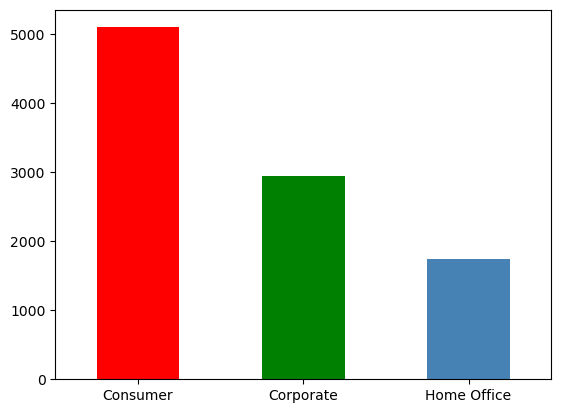

In [18]:
df_1['Segment'].value_counts()
color_list = ['red','green','steelblue','purple','cadetblue','maroon']
df_1['Segment'].value_counts().plot.bar(color = color_list)
plt.xticks(rotation=360);

#### Note:
Approximately 52% of the segments representing product sales were attributed to Consumers, indicating a significant portion of the market share within the dataset.


#### 1. Which category of products sells the most?

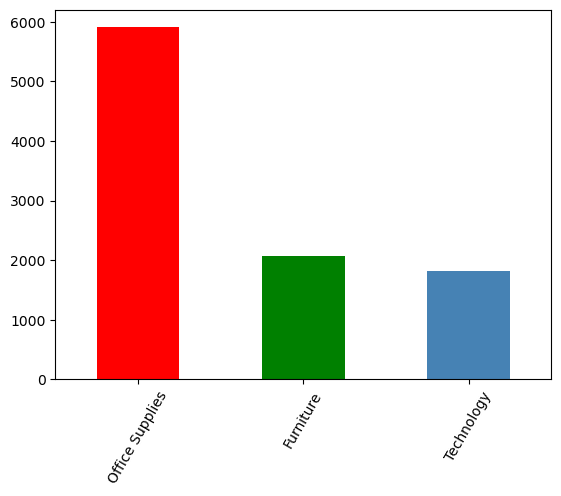

In [19]:
df_1['Category'].value_counts()


df_1['Category'].value_counts().plot.bar(color = color_list)
plt.xticks(rotation=60);

Note: 60% of the total sales revenue in the dataset was attributed to products categorized as Office Supplies, indicating a significant dominance of this product category within the retail superstore's sales portfolio.

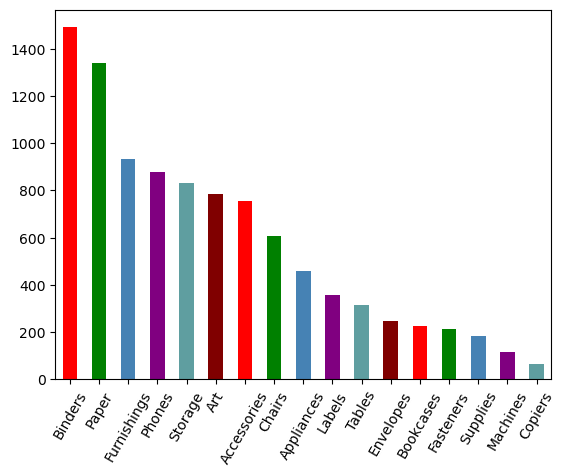

In [20]:
df_1['Sub-Category'].value_counts()

df_1['Sub-Category'].value_counts().plot.bar(color = color_list)
plt.xticks(rotation=60);

This interactive visualization is presented as a nested pie chart, also known as a sunburst chart, created using Plotly. It visually represents the hierarchical relationship between different categories and subcategories of data. Each layer of the chart corresponds to a category, with subcategories nested within them, providing a detailed view of the data structure. Users can interact with the chart by clicking or unclicking on the categories, dynamically altering the display to reveal or hide specific details. This interactivity allows for a comprehensive exploration of the data, enabling users to gain insights into the distribution and composition of categories and subcategories.

In [21]:
import plotly.express as px
# Summarize the Sales data by Category and Sub-Category

custom_colors = ["#FF5733", "#33FF57", "#3366FF", "#FF33CC"]
df_1_summary = df_1.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()
# Create a nested pie chart
fig = px.sunburst(
    df_1_summary,
    path=['Category', 'Sub-Category'],
    values='Sales',
     color='Sales',
    color_discrete_sequence=custom_colors,

)

fig.show()

#### Note:
The analysis reveals that consumer-driven demand significantly influences sales across various product categories and regions. Notably, technology items emerge as the top-selling products across both the western and eastern regions, with furniture and office supplies ranking closely behind. In contrast, sales trends in the Central and Southern regions exhibit a different pattern, with higher demand observed for office supplies and furniture compared to technological products. This regional variation underscores the importance of understanding local preferences and market dynamics when devising sales strategies and allocation of resources within the retail superstore.

#### 3. Which category of shipping contains the highest percentage ratio?
This was answered by showing the distribution and the frequency of the shipping class accross the category

In [22]:
categorical_columns = ['Ship Mode', 'Segment', 'State','Region', 'Category', 'Sub-Category', 'Customer Name', 'City']

def cat_summary(dataframe, plot=False, categorical_columns = cat_cols, threshold=10):
    for col_name in categorical_columns:
        print("#" * 30 + " Unique Values Of " + col_name + " column " + "#" * 30)
        print(col_name + ": " + str(dataframe[col_name].nunique()))
        
        print("#" * 30 + " Frequencies of Class Values " + "#" * 30)
        value_counts = dataframe[col_name].value_counts()
        if dataframe[col_name].nunique() > threshold:
            top_n_values = value_counts.head(threshold)
            #other_count = value_counts[threshold:].sum()
            #top_n_values['Others'] = other_count
            value_counts = top_n_values
        
        print(pd.DataFrame({col_name: value_counts,
                            "Ratio": value_counts / len(dataframe[col_name])}))
        
        if plot:
            rgb_values = sns.color_palette("Set3", 6)
            sns.set_theme(style="darkgrid")
            
            if dataframe[col_name].nunique() > threshold:
                plt.figure(figsize=(13,6))  
            
            ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette=rgb_values)
            ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
            for p in ax.patches:
                ax.annotate(f'\n{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='top', color='white', size=10)
            plt.show()
            
def num_summary(dataframe, plot = False):
    quantiles = [0, 0.25, 0.50, 0.75, 1.0]
    
    for col_name in num_cols:
        print("#"*30 + " Distribution of " + col_name+ " column" + "#"*30)
        print(dataframe[col_name].describe(quantiles).T)
        
        if plot:
            sns.histplot(data = dataframe, x = col_name)
            plt.xlabel(col_name)
            plt.title("The Distribution of "+ col_name)
            plt.grid(True, alpha = 0.5)
            plt.show(block = True)
            
def autopct_format(values): 
    def my_format(pct): 
        total = sum(values) 
        val = int(round(pct*total/100.0))
        return ' ${v:d}'.format(v=val)
    return my_format

############################## Unique Values Of Ship Mode column ##############################
Ship Mode: 4
############################## Frequencies of Class Values ##############################
                Ship Mode     Ratio
Standard Class       5859  0.597857
Second Class         1902  0.194082
First Class          1501  0.153163
Same Day              538  0.054898


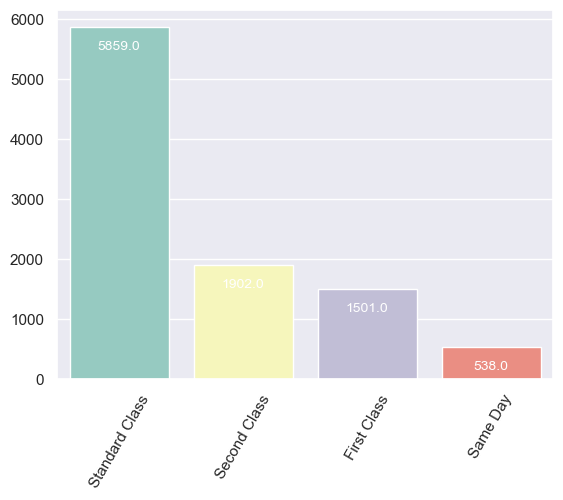

############################## Unique Values Of Segment column ##############################
Segment: 3
############################## Frequencies of Class Values ##############################
             Segment     Ratio
Consumer        5101  0.520510
Corporate       2953  0.301327
Home Office     1746  0.178163


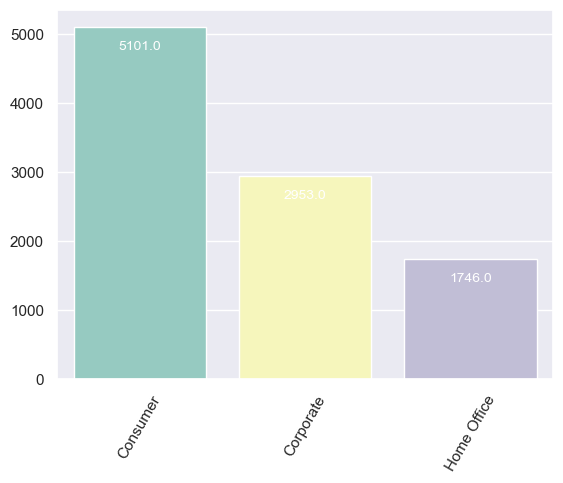

############################## Unique Values Of State column ##############################
State: 49
############################## Frequencies of Class Values ##############################
                State     Ratio
California       1946  0.198571
New York         1097  0.111939
Texas             973  0.099286
Pennsylvania      582  0.059388
Washington        504  0.051429
Illinois          483  0.049286
Ohio              454  0.046327
Florida           373  0.038061
Michigan          253  0.025816
North Carolina    247  0.025204


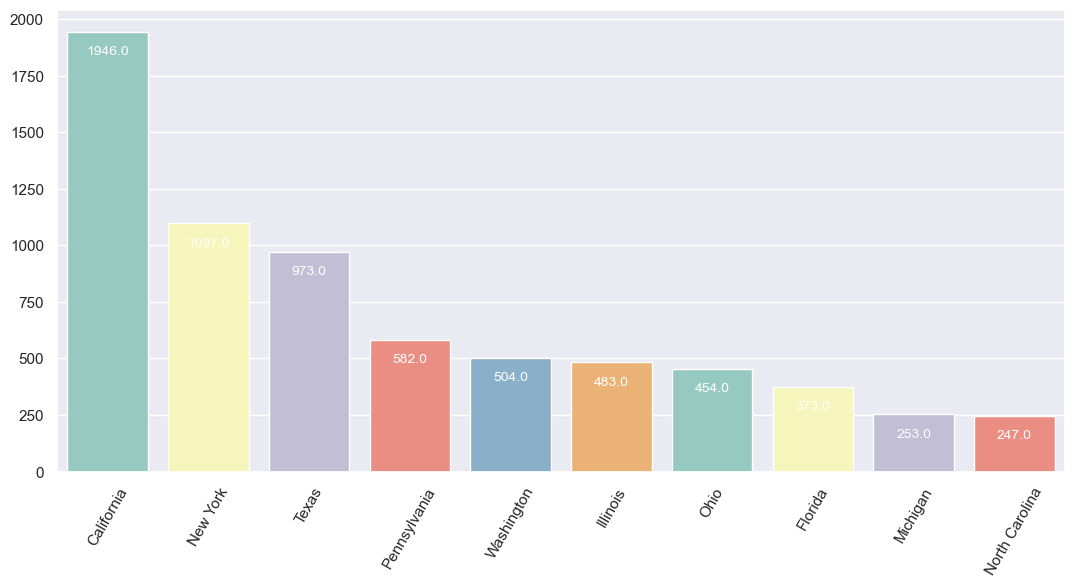

############################## Unique Values Of Region column ##############################
Region: 4
############################## Frequencies of Class Values ##############################
         Region     Ratio
West       3140  0.320408
East       2785  0.284184
Central    2277  0.232347
South      1598  0.163061


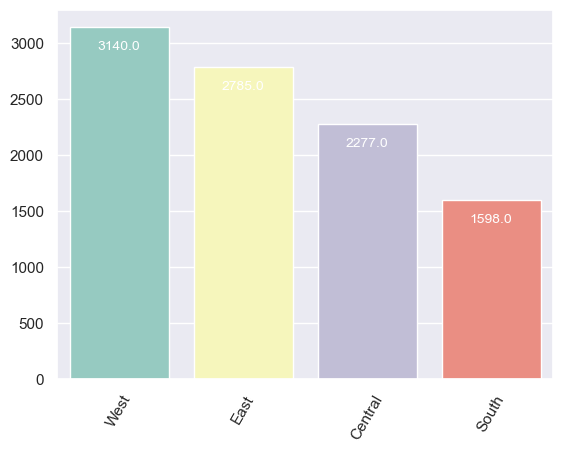

############################## Unique Values Of Category column ##############################
Category: 3
############################## Frequencies of Class Values ##############################
                 Category     Ratio
Office Supplies      5909  0.602959
Furniture            2078  0.212041
Technology           1813  0.185000


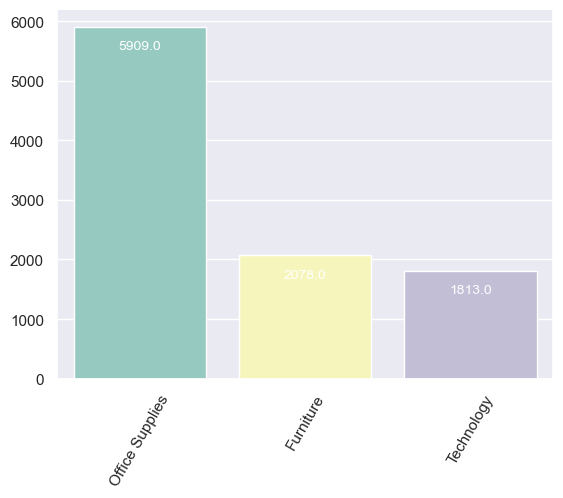

############################## Unique Values Of Sub-Category column ##############################
Sub-Category: 17
############################## Frequencies of Class Values ##############################
             Sub-Category     Ratio
Binders              1492  0.152245
Paper                1338  0.136531
Furnishings           931  0.095000
Phones                876  0.089388
Storage               832  0.084898
Art                   785  0.080102
Accessories           756  0.077143
Chairs                607  0.061939
Appliances            459  0.046837
Labels                357  0.036429


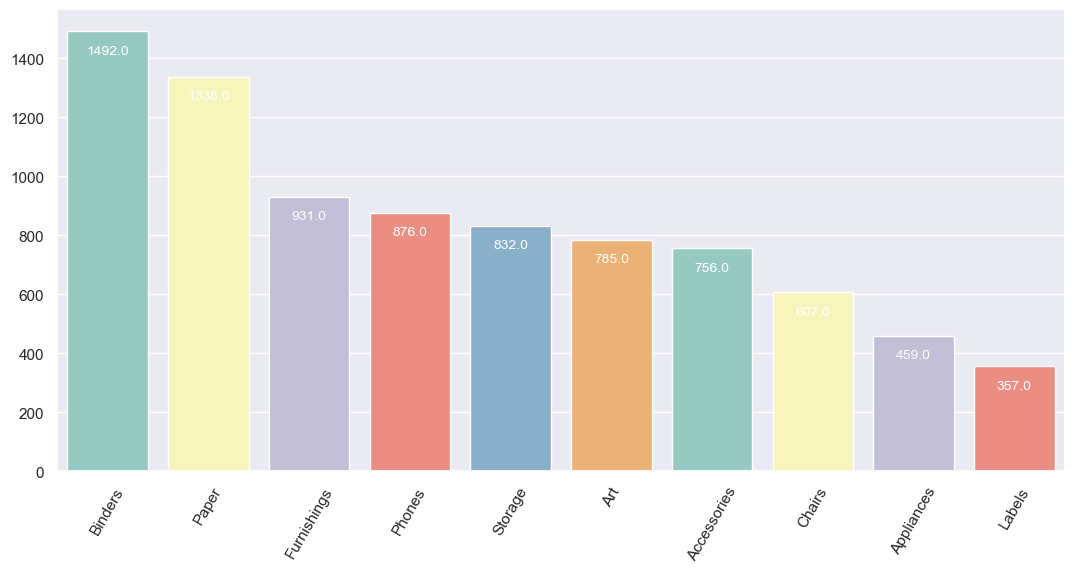

############################## Unique Values Of Customer Name column ##############################
Customer Name: 793
############################## Frequencies of Class Values ##############################
                     Customer Name     Ratio
William Brown                   35  0.003571
Matt Abelman                    34  0.003469
Paul Prost                      34  0.003469
John Lee                        33  0.003367
Chloris Kastensmidt             32  0.003265
Jonathan Doherty                32  0.003265
Seth Vernon                     32  0.003265
Emily Phan                      31  0.003163
Zuschuss Carroll                31  0.003163
Arthur Prichep                  31  0.003163


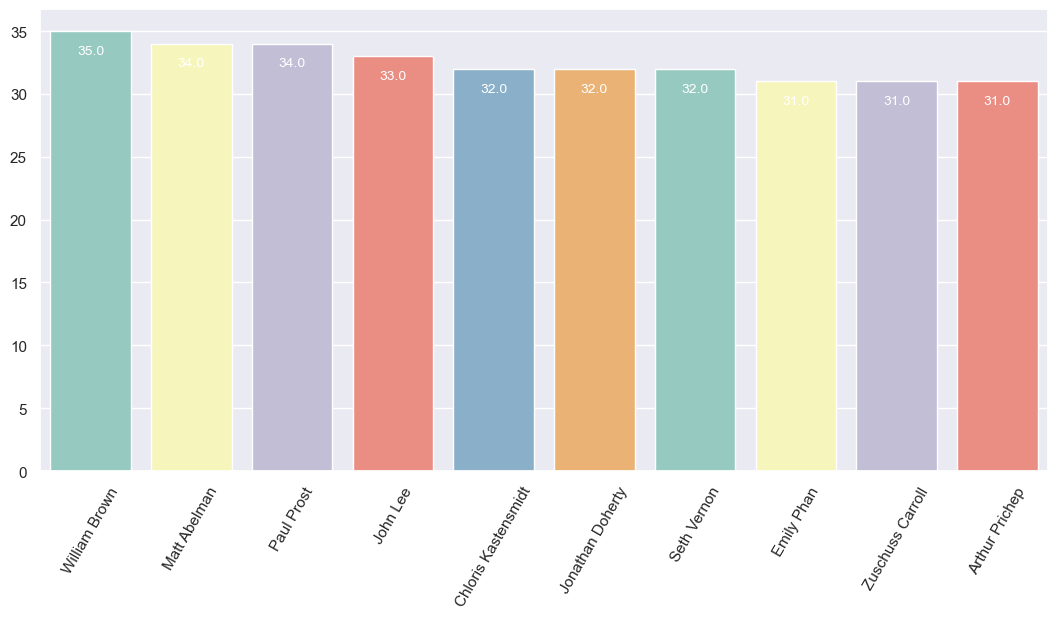

############################## Unique Values Of City column ##############################
City: 529
############################## Frequencies of Class Values ##############################
               City     Ratio
New York City   891  0.090918
Los Angeles     728  0.074286
Philadelphia    532  0.054286
San Francisco   500  0.051020
Seattle         426  0.043469
Houston         374  0.038163
Chicago         308  0.031429
Columbus        221  0.022551
San Diego       170  0.017347
Springfield     161  0.016429


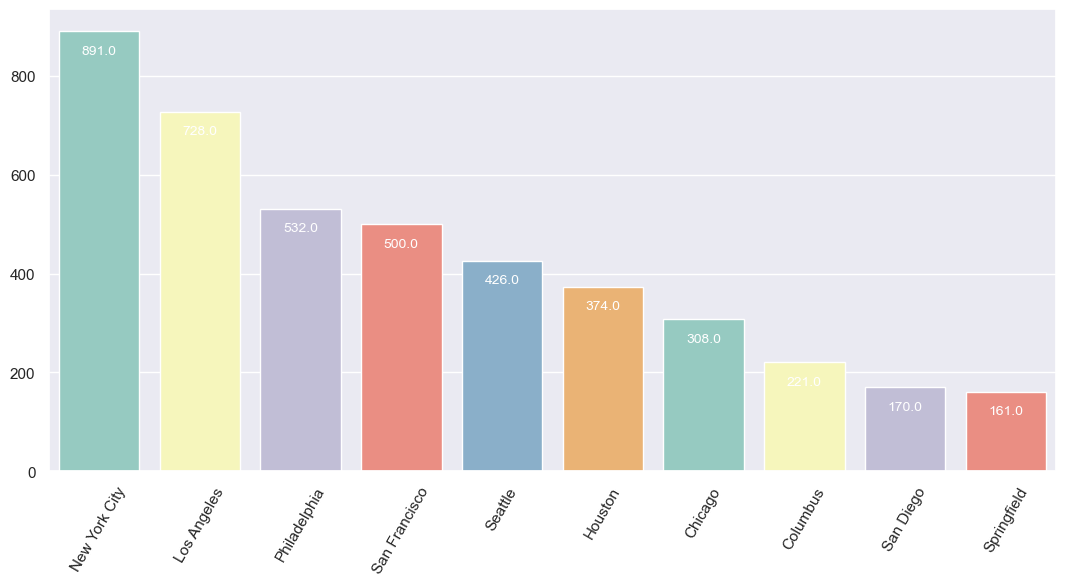

In [23]:
cat_summary(df_1,True,categorical_columns = categorical_columns,threshold = 10)

##### Note
The detailed visualization of order distribution across diverse shipping options provides valuable insights into consumer preferences and priorities regarding shipment methods. This rich dataset enables the optimization of logistical operations, facilitating the alignment of shipping strategies with client expectations for punctual and reliable order delivery. By leveraging this information, businesses can enhance efficiency in their supply chain management and ensure customer satisfaction through timely and dependable shipping services.

#### This is an interactive treemap chart that shows the linkage between Shipping Mode, Category and Sub Category

In [24]:
# Summarize the Sales data by Category, Ship Mode, and Sub-Category
df_sum = df_1.groupby(['Category', 'Ship Mode', 'Sub-Category'])['Sales'].sum().reset_index()

# Create a treemap
fig = px.treemap(
    df_sum,
    path=['Category', 'Ship Mode', 'Sub-Category'],
    values='Sales',
)

fig.show()

In [25]:
import plotly.io as pio
pio.renderers.default = 'notebook_connected'

#### 4. Shown total sales by each states in the US
I will start by showing the total sales over the years then sales of each states over time

Text(0.5, 1.0, 'Trend of Total sales over the years')

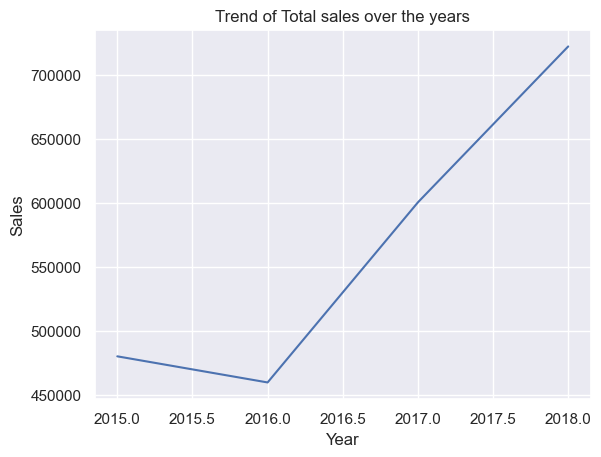

In [26]:
df_1.groupby("Year")["Sales"].sum().plot()
plt.ylabel("Sales")
plt.title("Trend of Total sales over the years")

#### Note: 
From the chart, it is shown that there is been a significant rise in sales from the Mid 2016 to date

In [27]:
# Create a mapping for all 50 states 
all_state_mapping = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR",
    "California": "CA", "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE",
    "Florida": "FL", "Georgia": "GA", "Hawaii": "HI", "Idaho": "ID", "Illinois": "IL",
    "Indiana": "IN", "Iowa": "IA", "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA",
    "Maine": "ME", "Maryland": "MD", "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN",
    "Mississippi": "MS", "Missouri": "MO", "Montana": "MT", "Nebraska": "NE", "Nevada": "NV",
    "New Hampshire": "NH", "New Jersey": "NJ", "New Mexico": "NM", "New York": "NY",
    "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH", "Oklahoma": "OK",
    "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC",
    "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Vermont": "VT",
    "Virginia": "VA", "Washington": "WA", "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY"
}

# Add the Abbreviation column to the DataFrame
df['Abbreviation'] = df_1['State'].map(all_state_mapping)

# Group by state and calculate the sum of sales
sum_of_sales = df_1.groupby('State')['Sales'].sum().reset_index()

# Add Abbreviation to sum_of_sales
sum_of_sales['Abbreviation'] = sum_of_sales['State'].map(all_state_mapping)

# Create a choropleth map using Plotly
fig = go.Figure(data=go.Choropleth(
    locations=sum_of_sales['Abbreviation'],
    locationmode='USA-states',
    z=sum_of_sales['Sales'],
    hoverinfo='location+z',
    showscale=True
))

fig.update_geos(projection_type="albers usa")
fig.update_layout(
    geo_scope='usa',
    title='Total Sales by United States'
)

fig.show()


#### Note:
In terms of sales performance, California emerges as the frontrunner, boasting the highest sales figures across the nation, closely trailed by New York. Conversely, states such as South Dakota, Maine, West Virginia, and North Dakota exhibit comparatively lower sales volumes, positioning them at the bottom of the sales spectrum nationwide.

#### 5. What is the Yearly and Monthly Sales distribution trend over the years (2015- 2018)¶

In [31]:
Year_sales_trend = df_1.groupby(['Year', 'Month']).sum()['Sales'].reset_index()
Year_sales_trend

Year      Month       Sales
0   2015      April  24710.0160
1   2015     August  37349.2655
2   2015   December  63568.3107
3   2015   February  12588.4840
4   2015    January  28828.2540
5   2015       July  35194.5580
6   2015       June  29181.3346
7   2015      March  54027.6920
8   2015        May  29520.4900
9   2015   November  64369.4565
10  2015    October  34561.9470
11  2015  September  65956.3998
12  2016      April  38056.9685
13  2016     August  49076.9300
14  2016   December  52891.8832
15  2016   February  20728.3520
16  2016    January  29347.3864
17  2016       July  28573.3100
18  2016       June  28515.9082
19  2016      March  34489.6776
20  2016        May  30761.5585
21  2016   November  50009.1450
22  2016    October  31631.8890
23  2016  September  65352.9970
24  2017      April  42368.0480
25  2017     August  45766.8144
26  2017   December  72847.0855
27  2017   February  48907.5900
28  2017    January  38048.1840
29  2017       July  41761.9430
30  2017       June  37424.6810
31  2017      March  48990.1410
32  2017        May  64836.2518
33  2017   November  66392.5470
34  2017    October  52156.9580
35  2017  September  40692.3063
36  2018      April  37849.2156
37  2018     August  75408.7840
38  2018   December  56959.2358
39  2018   February  48928.8334
40  2018    January  59767.0910
41  2018       July  53942.7755
42  2018       June  46912.8475
43  2018      March  74748.6238
44  2018        May  40882.4464
45  2018   November  87997.6400
46  2018    October  65501.1622
47  2018  September  73153.3640

Plotting the graph to show the sales trend over the years
I am going to use plotly to plot the graph.

Firstly, i combined the year and month columns from the the original data to a single columnm for the sole purpose sale trend chart. I will show the monthly and daily sales pattern.
I have two DateTime type variables named Ship Date and Order Date. Among these two variables, I want to analyze the time-dependent changes in our Sales variable with respect to the Order Date. Hence, i use line plots to visualize how the Sales variable changes over time across different categorical variables.

In [32]:
df_1['Month-Year'] = df_1['Order Date'].dt.strftime('%b-%Y')

Monthly_sales = df_1.groupby('Month-Year').agg({'Sales': 'sum'}).reset_index()
Monthly_sales['Order'] = pd.to_datetime(Monthly_sales['Month-Year'], format='%b-%Y')
Monthly_sales = Monthly_sales.sort_values('Order')


fig = px.line(Monthly_sales, x='Month-Year', y='Sales', title='Sales Trend Over the Years',
              labels={'Month-Year': 'Month-Year', 'Sales': 'Sales'})

fig.update_traces(hovertemplate='Date: %{x}<br>Sales: %{y:,.2f}<extra></extra>')


fig.update_xaxes(tickangle=90, tickmode='array', tickvals=Monthly_sales['Month-Year'],
                 ticktext=Monthly_sales['Month-Year'])


fig.update_layout(width=900, height=600)


fig.show()

In [35]:
def time_breakdown(dataframe = df_1, date_col = 'Order Date',categorical_columns = cat_cols, threshold = 10):
    dataframe[f'Month_Year_{date_col}'] = dataframe[date_col].dt.strftime('%b-%Y')
    for cat_col in categorical_columns:
        if dataframe[cat_col].nunique() <= threshold:
            Monthly_sales = dataframe.groupby([f'Month_Year_{date_col}',cat_col]).agg({'Sales': 'sum'}).reset_index()
            Monthly_sales['Order'] = pd.to_datetime(Monthly_sales[f'Month_Year_{date_col}'], format='%b-%Y')
            Monthly_sales = Monthly_sales.sort_values('Order')


            fig = px.line(Monthly_sales, x=f'Month_Year_{date_col}', y='Sales', title='Monthly Observation of Sales',
              labels={f'Month-Year_{date_col}': f'Month_Year_{date_col}', 'Sales': 'Sales'}, color = cat_col)

            fig.update_traces(hovertemplate='Date: %{x}<br>Sales: %{y:,.2f}<extra></extra>')


            fig.update_xaxes(tickangle=90, tickmode='array', tickvals=Monthly_sales[f'Month_Year_{date_col}'],
                     ticktext=Monthly_sales[f'Month_Year_{date_col}'])


            fig.update_layout(width=1000, height=600)


            fig.show()
            
time_breakdown(df_1, 'Order Date', categorical_columns = categorical_columns, threshold = 10)

After analyzing the charts showing the sales data, initial observations suggest the presence of an upward trend. However, to validate this preliminary finding, I intend to conduct a stationarity test. 

In [36]:
df_1['WeekDay'] = df_1['Order Date'].dt.day_name()
start_date = df_1['Order Date'].min()
df_1['Week'] = ((((df_1['Order Date'] - start_date).dt.days)/7) +1).astype(int)
df_plot = df_1.groupby('Order Date').agg({'Sales':'sum'}).rename(columns = {'Sales':'Total Sales'}).reset_index().sort_values(by = 'Order Date', ascending = True)

fig = px.line(df_plot, x="Order Date", y="Total Sales", title='Total Sales by Date', color_discrete_sequence=['red'])
fig.show()

#### Note:
As the graph illustrates, sales do not appear to follow a clear pattern based on the quantity of orders; yet, it reveals seasonality. But the seasonality pattern and the daily trend is not clear when we make a line plot based on the total sales value.




####  6. How are the sales trending over time? Are there any noticeable seasonal patterns?¶

In [37]:
df_1.Region.unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [38]:
df_1['Order Date']

0      2017-08-11
1      2017-08-11
2      2017-12-06
3      2016-11-10
4      2016-11-10
          ...    
9795   2017-05-21
9796   2016-12-01
9797   2016-12-01
9798   2016-12-01
9799   2016-12-01
Name: Order Date, Length: 9800, dtype: datetime64[ns]

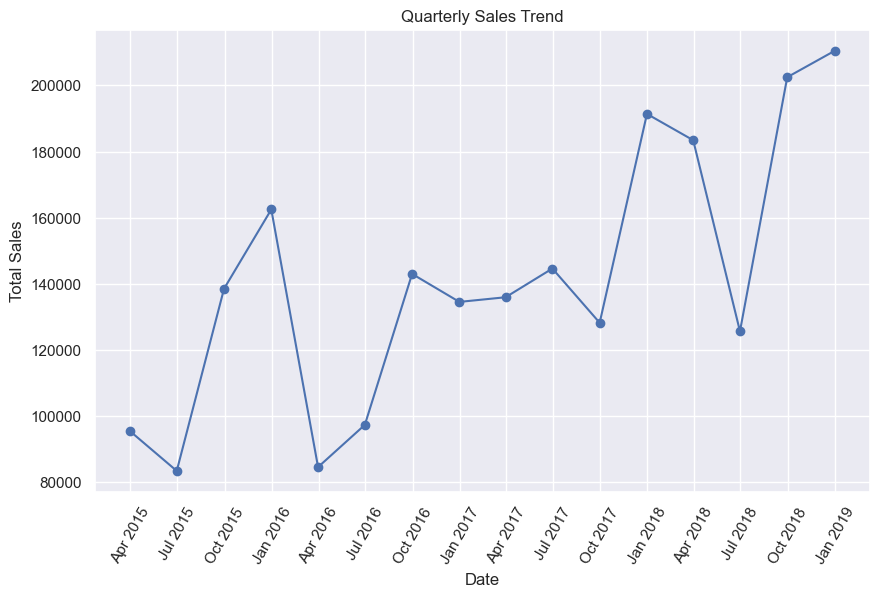

In [39]:
order_date_df = df_1.set_index('Order Date') # We create a new df but this has 'Order Date' as index, that will help us

# Quarterly sales
quarterly_sales = order_date_df['Sales'].resample('Q').sum()
quarterly_sales = quarterly_sales.round(2)

plt.figure(figsize=(10, 6))
plt.plot(quarterly_sales.index, quarterly_sales.values, marker='o', linestyle='-')

# Customize x-axis ticks for quarterly intervals
ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator(bymonth=[1, 4, 7, 10]))
ax.xaxis.set_major_formatter(DateFormatter('%b %Y'))

plt.title('Quarterly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=60)
plt.grid(True)
plt.show()

#### Note:
The analysis indicates a consistent peak in sales during January across multiple years. Following this peak, a recurrent trend emerges wherein sales exhibit a decline post-January, gradually rebounding from April onwards until reaching another peak in the subsequent January. This cyclical pattern underscores the recurring seasonal dynamics influencing sales trends, with notable variations in consumer behavior and market demand throughout the year.

#### 7. Are there any specific regions where sales are consistently lower? What factors might be contributing to this?

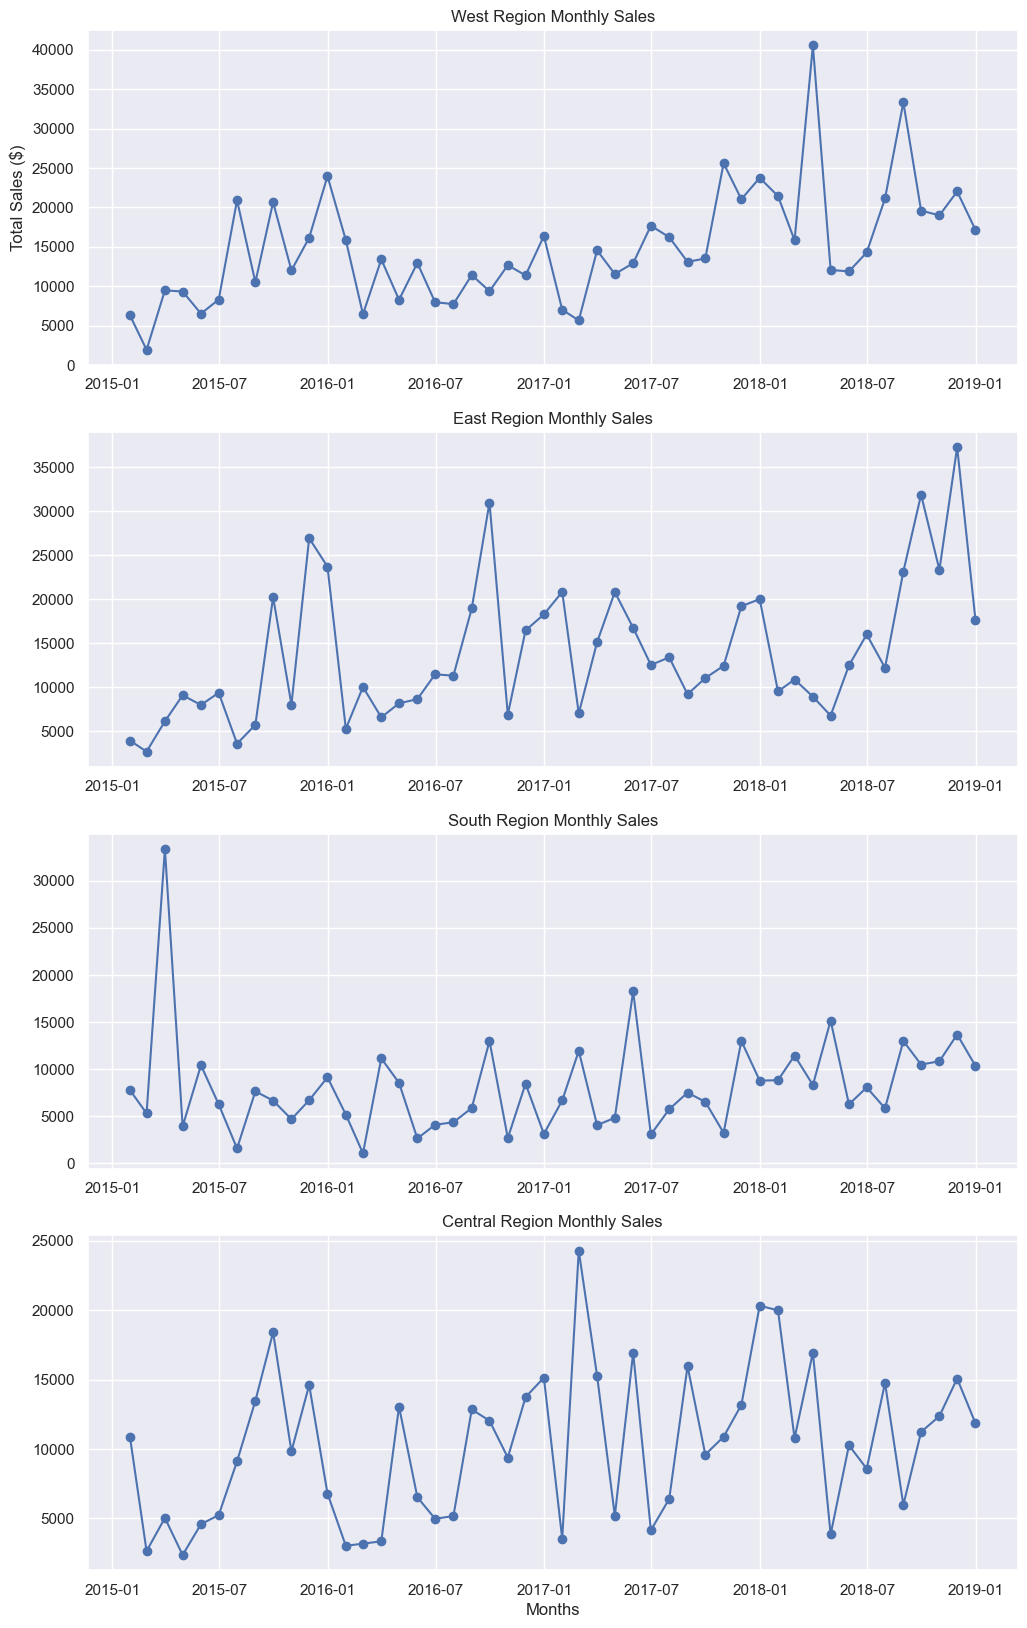

In [40]:
# In the first section i created a order_date_df, i can use it to solve this problem
west_df = order_date_df.loc[order_date_df['Region'] == 'West']
east_df = order_date_df.loc[order_date_df['Region'] == 'East']
south_df = order_date_df.loc[order_date_df['Region'] == 'South']
central_df = order_date_df.loc[order_date_df['Region'] == 'Central']

west_monthly_sales = west_df['Sales'].resample('M').sum()
west_monthly_sales = west_monthly_sales.round(2)

east_monthly_sales = east_df['Sales'].resample('M').sum()
east_monthly_sales = east_monthly_sales.round(2)

south_monthly_sales = south_df['Sales'].resample('M').sum()
south_monthly_sales = south_monthly_sales.round(2)

central_monthly_sales = central_df['Sales'].resample('M').sum()
central_monthly_sales = central_monthly_sales.round(2)

fig, (ax_west, ax_east, ax_south, ax_central) = plt.subplots(nrows=4, ncols=1, figsize=(12, 20))

ax_west.plot(west_monthly_sales.index, west_monthly_sales.values, marker='o', linestyle='-')
ax_east.plot(east_monthly_sales.index, east_monthly_sales.values, marker='o', linestyle='-')
ax_south.plot(south_monthly_sales.index, south_monthly_sales.values, marker='o', linestyle='-')
ax_central.plot(central_monthly_sales.index, central_monthly_sales.values, marker='o', linestyle='-')

ax_west.set_title('West Region Monthly Sales')
ax_east.set_title('East Region Monthly Sales')
ax_south.set_title('South Region Monthly Sales')
ax_central.set_title('Central Region Monthly Sales')
ax_west.set_ylabel('Total Sales ($)')
ax_central.set_xlabel('Months')
plt.show()

In [41]:
Sales_trend = df_1[['Month-Year','Sales']].groupby('Month-Year').sum()
Sales_trend = Sales_trend.sort_values(by='Month-Year')
Sales_trend.head()

Sales
Month-Year            
Apr-2015    24710.0160
Apr-2016    38056.9685
Apr-2017    42368.0480
Apr-2018    37849.2156
Aug-2015    37349.2655

#### Note:
The analysis of sales data reveals a consistent upward trend in overall sales across the western region, punctuated by occasional downturns. Notably, sales exhibited a recurring surge every January. The year 2018 witnessed a sustained growth trajectory, albeit preceded by a period of stagnation. Conversely, the eastern region also experienced a consistent uptick in sales each January. Sales in the southern region peaked during the spring of 2015, maintaining relative stability until the end of 2018. In the central region, sales reached their zenith during the autumn of 2015, sustaining a steady trajectory until the fall of 2017."

#### 8. What is the average daily sales?
In this category, i aim to show whether there is a variation in sales on different days of the week and to determine if there is a sales peak on specific days.

In [42]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df_plot_dayofweek = df_1[['WeekDay', 'Sales', 'Order ID']].groupby(['WeekDay']).agg({'Sales': 'sum', 'Order ID': 'count'}).rename(columns = {'Sales': 'Total Sales', 'Order ID':'Order Count'}).reset_index()

df_plot_dayofweek = df_plot_dayofweek.set_index('WeekDay').loc[day_order].reset_index()

fig_dayofweek = px.bar(df_plot_dayofweek, x = 'WeekDay', y = 'Order Count',hover_data=['WeekDay', 'Order Count'], 
                       labels={'WeekDay': 'WeekDay', 'Order Count': 'Order Count'}, 
                       color = 'Order Count', color_discrete_sequence=['green'])
    
fig_dayofweek.update_traces(hovertemplate='WeekDay: %{x}<br>Order Count: %{y}<extra></extra>')

fig_dayofweek.update_layout(title='Average Order Count by Day Of Week',width=1000, height=400)

fig_dayofweek.update_traces(text=df_plot_dayofweek['Order Count'], 
                  texttemplate='%{text:.2f}', 
                  textfont=dict(color='maroon', size=14, family='Arial'),
                  textangle=0,textposition='outside')
fig_dayofweek.show()

In [43]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df_plot_dayofweek = df_1[['WeekDay', 'Sales', 'Order ID']].groupby(['WeekDay']).agg({'Sales': 'sum', 'Order ID': 'count'}).rename(columns = {'Sales': 'Total Sales', 'Order ID':'Order Count'}).reset_index()

df_plot_dayofweek = df_plot_dayofweek.set_index('WeekDay').loc[day_order].reset_index()

fig_dayofweek = px.bar(df_plot_dayofweek, x = 'WeekDay', y = 'Total Sales',hover_data=['WeekDay', 'Total Sales'], 
                       labels={'WeekDay': 'WeekDay', 'Total Sales': 'Total Sales'}, 
                    color = 'Total Sales')
    
fig_dayofweek.update_traces(hovertemplate='WeekDay: %{x}<br>Total Sales: $%{y}<extra></extra>')

fig_dayofweek.update_layout(title='Total Daily Sales',width=1000, height=400)

fig_dayofweek.update_traces(text=df_plot_dayofweek['Total Sales'], 
                  texttemplate='$%{text:.2f}', 
                  textfont=dict(color='maroon', size=14, family='Arial'),
                  textangle=0,textposition='outside')
fig_dayofweek.show()

#### Note:
As shown in the chart, The daily sales and order count experience exhibits a distinctive trend, reaching its peak on specific Tuesdays and gradually declining until Thursday. This midweek dip in sales and orders may be attributed to various factors, such as midweek lulls or varying consumer behaviors during this period.
However, there is a noticeable resurgence in sales on Fridays, Saturdays, and Sundays, this  suggesting increased purchasing activity during the latter part of the week and the beginning of the weekend.

#### 7. What Product sells the most?

In [44]:
Total_Product = df_1['Product Name'].value_counts().head(10)
Total_Product

Staple envelope                                              47
Staples                                                      46
Easy-staple paper                                            44
Avery Non-Stick Binders                                      20
Staples in misc. colors                                      18
Staple remover                                               18
Storex Dura Pro Binders                                      17
KI Adjustable-Height Table                                   17
Staple-based wall hangings                                   16
Logitech 910-002974 M325 Wireless Mouse for Web Scrolling    15
Name: Product Name, dtype: int64

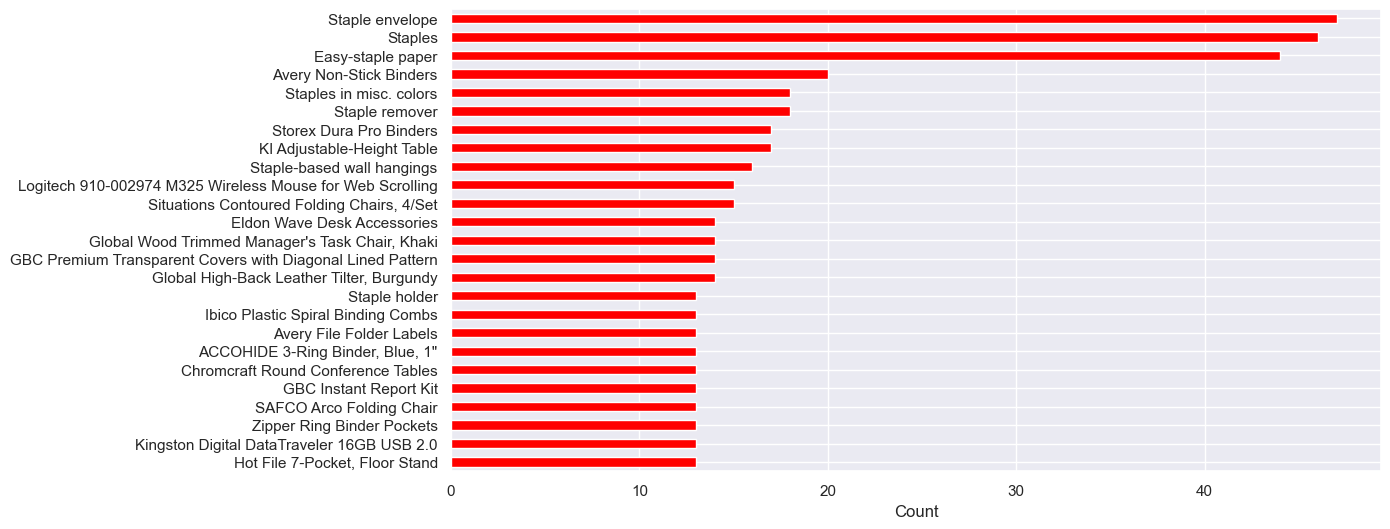

In [45]:
plt.figure(figsize=(12,6))
df_1['Product Name'].value_counts().head(25).sort_values().plot.barh(color = 'red')
plt.xlabel('Count');

#### Note:
Staple envelope, Staples, Easy-staple paper are most ordered product

Xiaomi Mi3, Universal Ultra Bright White Copier/Laser Paper, 8 1/2" x 11", Ream, Socket Bluetooth Cordless Hand Scanner (CHS), Logitech Illuminated Ultrathin Keyboard with Backlighting, LG G2 are less orderd product

### Decomposition of Time Series
Decomposition in time series forecasting refers to the process of breaking down a time series into its individual components. These components represent different patterns or structures within the time series data. The primary components typically include: Trend,Seasonality and Residual

In [46]:
#Intall the library
!pip install statsmodels

In [47]:
#Loading the library
from statsmodels.tsa.seasonal import STL

I am going to look at the daily and monthly data decomposition for trends and seasonality.
1. I will create a copy of the DataFrame to preserve the original "Order Date" column
2. The Order date in the copied date is in date_time format

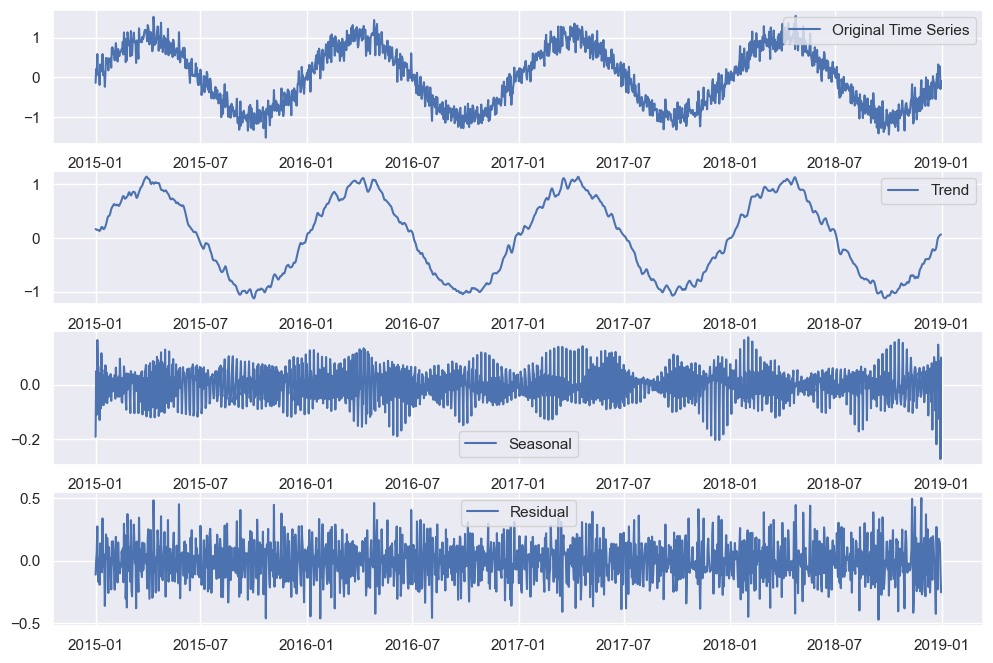

In [48]:
date_rng = pd.date_range(start='2015-01-01', end='2018-12-31', freq='D')
data = np.sin(np.arange(len(date_rng)) * (2 * np.pi / 365)) + np.random.normal(scale=0.2, size=len(date_rng))
df_2 = pd.DataFrame(data, columns=['value'], index=date_rng)

# Performing STL decomposition
stl = STL(df_2['value'], seasonal=13)  # The 'seasonal' parameter represents the length of the seasonal component
result = stl.fit()

# Ploting the original time series, trend, seasonal, and residual components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df_2['value'], label='Original Time Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend()

plt.show()

### Adfuller test
Checking the stationary of the sales trend by using the Adfuller testing

In [49]:
# use adfuller to check if sales trend is stationary
from statsmodels.tsa.stattools import adfuller

In [50]:
result = adfuller(df_2,maxlag=30)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[0]<=-2.9 :
    print('==> Non-stationarity can be rejected')
else :
    print('==> Non-stationarity cannot be rejected')

ADF Statistic: -3.799596
p-value: 0.002911
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
==> Non-stationarity can be rejected


### Auto-Correlation and Partial Auto- Correlation
These are statistical tools used in time series analysis to identify patterns and relationships between observations at different lags. They help in understanding the temporal dependencies within a time series.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

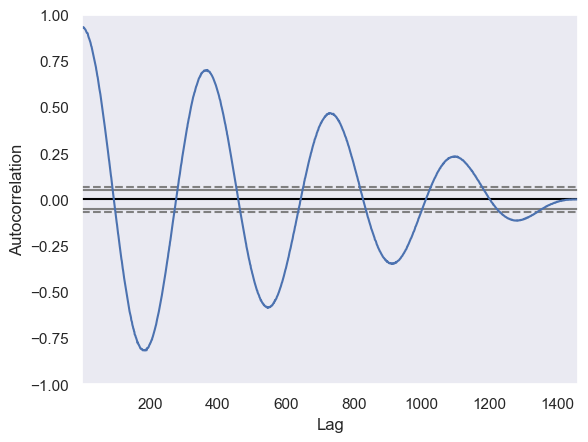

In [51]:
# autocorrelation
autocorrelation_plot(df_2)

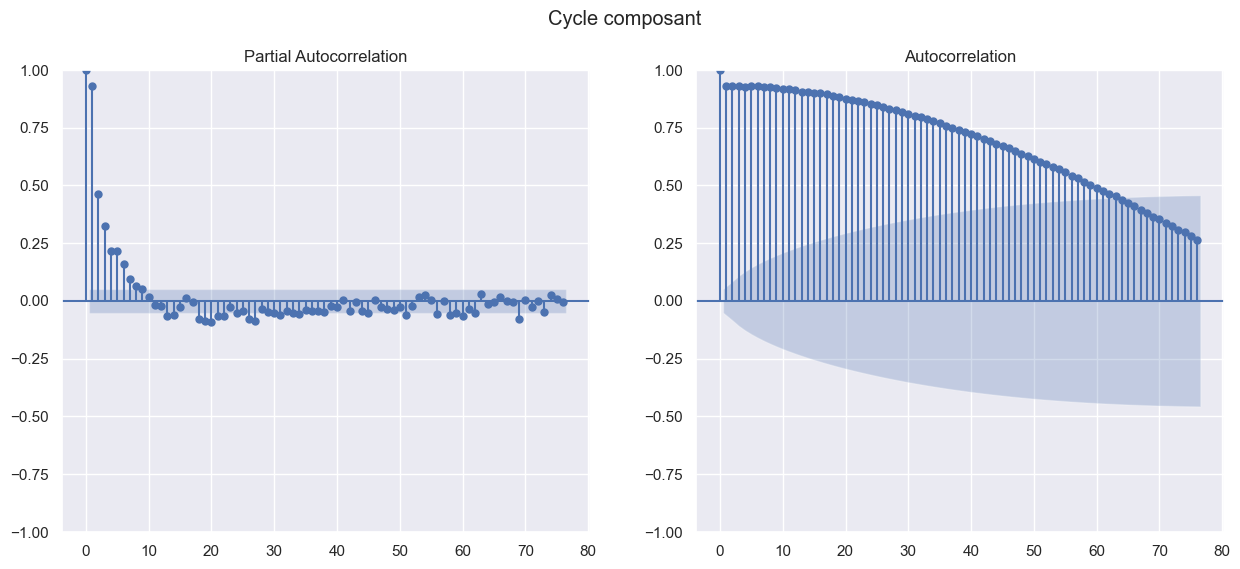

In [52]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
plot_pacf(df_2,lags=76,ax=axes[0])
plot_acf(df_2,lags=76,ax=axes[1])
fig.suptitle('Cycle composant')
plt.show()

### Time Series Forecasting With Facebook's Prophet¶
Facebook Prophet is a forecasting procedure developed by Facebook, now Meta. The library is available in R and Python.

In [53]:
df_prophet = df_1[["Order Date","Sales"]]
df_prophet

Order Date     Sales
0    2017-08-11  261.9600
1    2017-08-11  731.9400
2    2017-12-06   14.6200
3    2016-11-10  957.5775
4    2016-11-10   22.3680
...         ...       ...
9795 2017-05-21    3.7980
9796 2016-12-01   10.3680
9797 2016-12-01  235.1880
9798 2016-12-01   26.3760
9799 2016-12-01   10.3840

[9800 rows x 2 columns]

In [54]:
df_prophet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  9800 non-null   datetime64[ns]
 1   Sales       9800 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 153.2 KB


In [55]:
# Resample the data to monthly frequency and sum the sales for each month
df_prophet = df.resample('M', on='Order Date').sum()

# Rename columns as 'ds' and 'y' as required by Prophet
df_prophet.reset_index(inplace=True)
df_prophet  = df_prophet.rename(columns = {'Order Date': 'ds','Sales': 'y'})
df_prophet

ds           y
0  2015-01-31  28828.2540
1  2015-02-28  12588.4840
2  2015-03-31  54027.6920
3  2015-04-30  24710.0160
4  2015-05-31  29520.4900
5  2015-06-30  29181.3346
6  2015-07-31  35194.5580
7  2015-08-31  37349.2655
8  2015-09-30  65956.3998
9  2015-10-31  34561.9470
10 2015-11-30  64369.4565
11 2015-12-31  63568.3107
12 2016-01-31  29347.3864
13 2016-02-29  20728.3520
14 2016-03-31  34489.6776
15 2016-04-30  38056.9685
16 2016-05-31  30761.5585
17 2016-06-30  28515.9082
18 2016-07-31  28573.3100
19 2016-08-31  49076.9300
20 2016-09-30  65352.9970
21 2016-10-31  31631.8890
22 2016-11-30  50009.1450
23 2016-12-31  52891.8832
24 2017-01-31  38048.1840
25 2017-02-28  48907.5900
26 2017-03-31  48990.1410
27 2017-04-30  42368.0480
28 2017-05-31  64836.2518
29 2017-06-30  37424.6810
30 2017-07-31  41761.9430
31 2017-08-31  45766.8144
32 2017-09-30  40692.3063
33 2017-10-31  52156.9580
34 2017-11-30  66392.5470
35 2017-12-31  72847.0855
36 2018-01-31  59767.0910
37 2018-02-28  48928.8334
38 2018-03-31  74748.6238
39 2018-04-30  37849.2156
40 2018-05-31  40882.4464
41 2018-06-30  46912.8475
42 2018-07-31  53942.7755
43 2018-08-31  75408.7840
44 2018-09-30  73153.3640
45 2018-10-31  65501.1622
46 2018-11-30  87997.6400
47 2018-12-31  56959.2358

In [56]:
model = Prophet()
model.fit(df_prophet)

09:57:28 - cmdstanpy - INFO - Chain [1] start processing
09:57:29 - cmdstanpy - INFO - Chain [1] done processing


In [57]:
# Forcasting into the future
future = model.make_future_dataframe(periods=12,freq='M')
forecast = model.predict(future)
forecast.head

<bound method NDFrame.head of            ds         trend    yhat_lower     yhat_upper   trend_lower  \
0  2015-01-31  31723.677206  15006.356871   37032.112393  31723.677206   
1  2015-02-28  32268.101497   8552.404217   28402.314791  32268.101497   
2  2015-03-31  32870.856972  44886.010314   66519.024689  32870.856972   
3  2015-04-30  33454.168722   9660.483331   29818.524622  33454.168722   
4  2015-05-31  34056.924192  15979.867986   38566.339617  34056.924192   
5  2015-06-30  34640.235925  15559.182623   36962.866203  34640.235925   
6  2015-07-31  35242.991382  21856.083267   42657.945103  35242.991382   
7  2015-08-31  35845.746837  26807.328512   47015.252175  35845.746837   
8  2015-09-30  36429.058562  40696.651110   62725.750821  36429.058562   
9  2015-10-31  37031.814012  23656.804604   45254.930529  37031.814012   
10 2015-11-30  37615.125745  52073.978430   73926.036917  37615.125745   
11 2015-12-31  38217.881197  40204.928877   61804.513462  38217.881197   
12 2016-

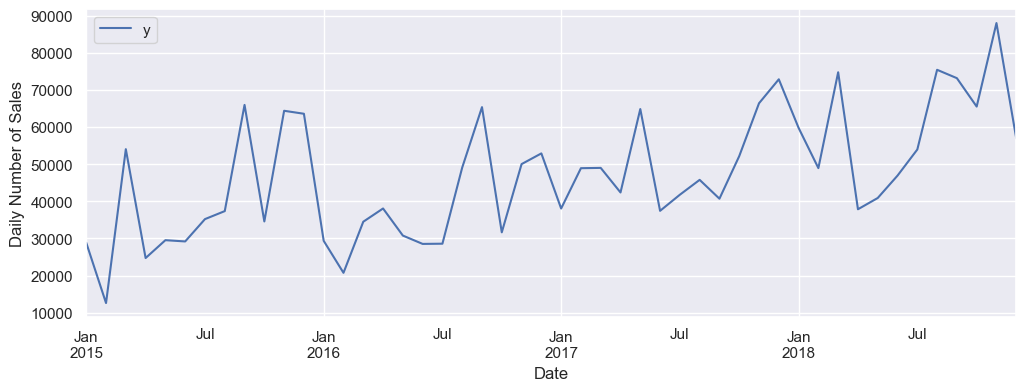

In [58]:
# plot daily sales
ax = df_prophet.set_index('ds').plot(figsize = (12, 4))
ax.set_ylabel('Daily Number of Sales')
ax.set_xlabel('Date')
plt.show()

#### Plot Forecast
Facebook Prophet includes a dedicated visualization package that utilizes model.plot() with a provided forecast as its argument for plotting.

In this context, the predicted values are represented by the blue line, and the dataset is denoted by black dots, providing a visual representation of the forecast alongside the actual data points.

<Axes: xlabel='ds', ylabel='y'>

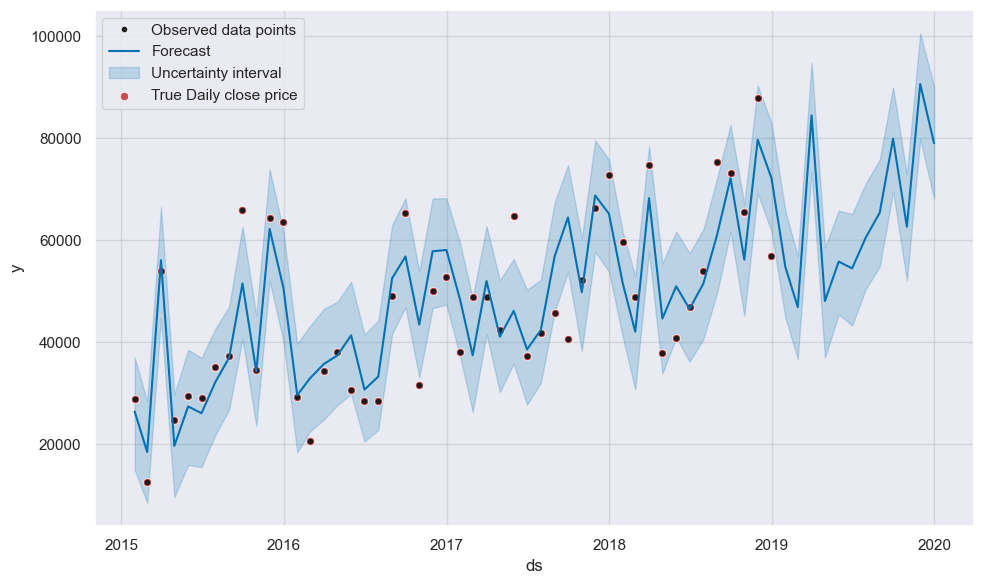

In [59]:
# Plot the forecast results
plot_1 = model.plot(forecast)
sns.scatterplot(x='ds', y='y', data=df_prophet, color = 'r', label='True Daily close price')

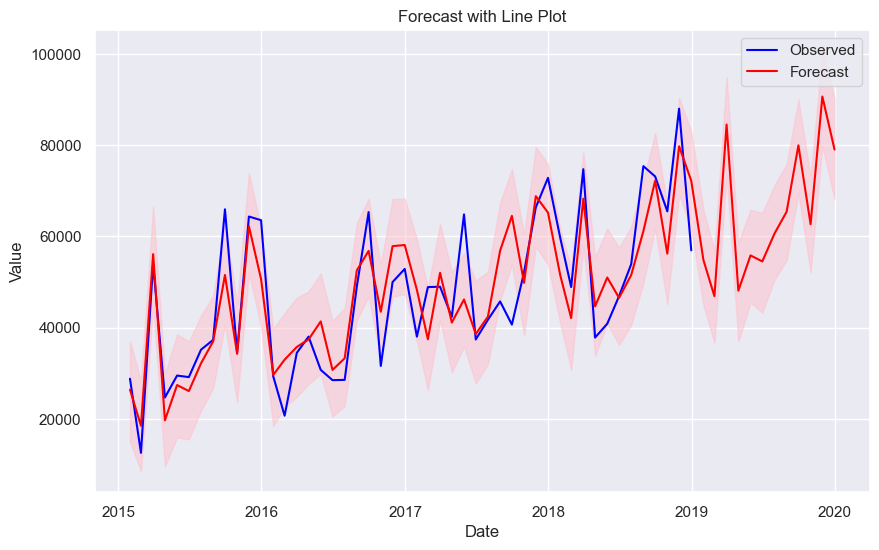

In [60]:
# Extract forecasted values
forecasted_data = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df_prophet['ds'], df_prophet['y'], label='Observed', color='blue')
plt.plot(forecasted_data['ds'], forecasted_data['yhat'], label='Forecast', color='red')
plt.fill_between(forecasted_data['ds'], forecasted_data['yhat_lower'], forecasted_data['yhat_upper'], color='pink', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Forecast with Line Plot')
plt.legend()
plt.show()

In [61]:
# Extract the actual data and forecast for the next 12 months
actual_data = df_prophet['y']
fitted_data = forecast['yhat'][:len(df_prophet)]  # Fitted values for the historical data
forecast_data = forecast['yhat'][len(df_prophet):]


In [62]:
# Calculate R-squared score for the fitted data
r2_fitted = 1 - np.sum((actual_data - fitted_data) ** 2) / np.sum((actual_data - actual_data.mean()) ** 2)


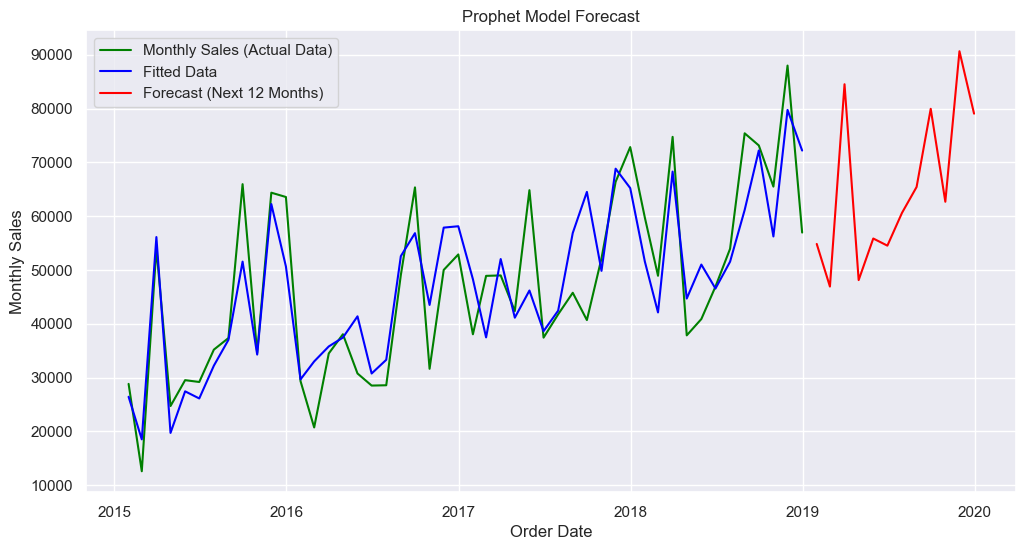

R-squared score for fitted data: 0.75


In [63]:
# Plot the actual data, fitted data, and forecast for the next 12 months
plt.figure(figsize=(12, 6))
plt.plot(df_prophet['ds'], actual_data, label='Monthly Sales (Actual Data)', color='green')
plt.plot(df_prophet['ds'], fitted_data, label='Fitted Data', color='blue')
plt.plot(forecast['ds'][len(df_prophet):], forecast_data, label='Forecast (Next 12 Months)', color='red')

plt.legend()
plt.xlabel('Order Date')
plt.ylabel('Monthly Sales')
plt.title('Prophet Model Forecast')
plt.show()

# Display R-squared score for the fitted data
print(f"R-squared score for fitted data: {r2_fitted:.2f}")

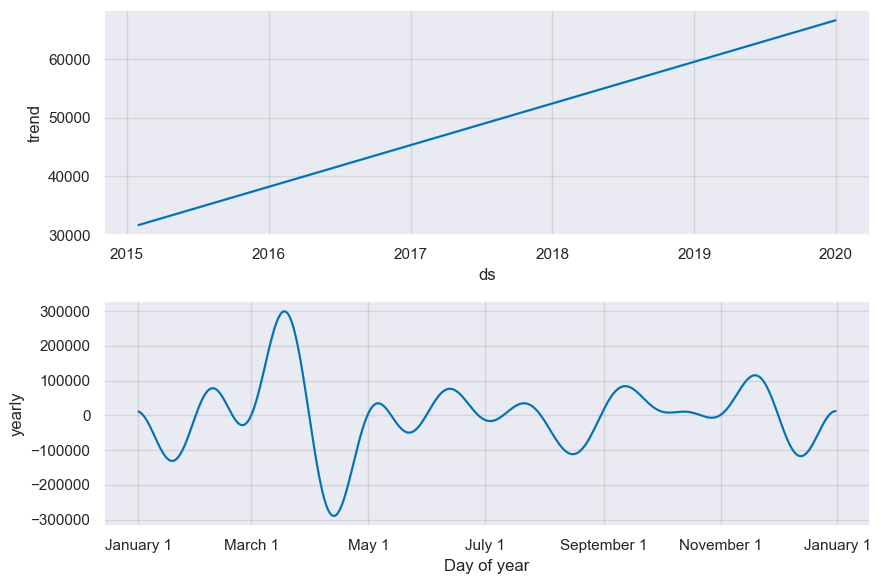

In [59]:
plot_2 = model.plot_components(forecast)

### RSME, MAPE AND R-Square for Prophet Model

In [60]:
# Calculate RMSE
rmse = np.sqrt(np.mean((actual_data - fitted_data) ** 2))

# Calculate R-squared score for the fitted data
r2_fitted = 1 - np.sum((actual_data - fitted_data) ** 2) / np.sum((actual_data - actual_data.mean()) ** 2)

# Calculate MAPE
mape = np.mean(np.abs((actual_data - fitted_data) / actual_data)) * 100

# Display R-squared score for the fitted data
print(f"R-squared score for fitted data: {r2_fitted:.2f}")

print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

R-squared score for fitted data: 0.75
RMSE: 8337.57
MAPE: 14.79%


### Modelling with Holt-Winters(Additive Exponential Smoothing)

The Holt-Winters model, also known as the Triple Exponential Smoothing model, is an extension of the Holt's Linear Exponential Smoothing model with the added capability of handling seasonality. It is a powerful and widely used time series forecasting method that is particularly useful for data with both trend and seasonality components.
Holt-Winters models are widely used in various domains, including economics, finance, sales forecasting, and supply chain management. They are effective for capturing both short-term and long-term trends, as well as seasonality in time series data.


In [61]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
# Suppress warnings
warnings.filterwarnings("ignore")

In [62]:
df_winter = df_1[["Order Date","Sales"]]
df_winter

Order Date     Sales
0    2017-08-11  261.9600
1    2017-08-11  731.9400
2    2017-12-06   14.6200
3    2016-11-10  957.5775
4    2016-11-10   22.3680
...         ...       ...
9795 2017-05-21    3.7980
9796 2016-12-01   10.3680
9797 2016-12-01  235.1880
9798 2016-12-01   26.3760
9799 2016-12-01   10.3840

[9800 rows x 2 columns]

In [63]:
# Set 'Order Date' as the index
df.set_index('Order Date', inplace=True)

# Resample the data to monthly frequency and sum the sales for each month
df_winter = df['Sales'].resample('M').sum()

### Fine Tuning Holt Winters

In [64]:
# Split the data into training and test sets (80/20 split)
train_size = int(len(df_winter) * 0.8)
train = df_winter[:train_size]
test = df_winter[train_size:]

param_grid = {
    'seasonal': ['add', 'multiplicative'],
    'seasonal_periods': [12],
    'trend': ['add', 'additive', 'multiplicative'],
    'smoothing_level': [0.1, 0.2, 0.3, 0.4, 0.5],
    'smoothing_trend': [0.1, 0.2, 0.3, 0.4, 0.5],
    'smoothing_seasonal': [0.1, 0.2, 0.3, 0.4, 0.5],
    'damping_trend': [0.1, 0.2, 0.3, 0.4, 0.5],
}

best_model = None
best_mse = float('inf')

total_iterations = len(param_grid['seasonal']) * len(param_grid['seasonal_periods']) * len(param_grid['trend']) * \
                   len(param_grid['smoothing_level']) * \
                   len(param_grid['smoothing_trend']) * len(param_grid['smoothing_seasonal']) * len(param_grid['damping_trend'])

iteration = 0

In [65]:
# Perform a grid search by iterating over hyperparameters
for seasonal in param_grid['seasonal']:
    for seasonal_period in param_grid['seasonal_periods']:
        for trend in param_grid['trend']:
                for smoothing_level in param_grid['smoothing_level']:
                        for smoothing_trend in param_grid['smoothing_trend']:
                            for smoothing_seasonal in param_grid['smoothing_seasonal']:
                                for damping_trend in param_grid['damping_trend']:
                                    iteration += 1

                                    model = ExponentialSmoothing(train, seasonal=seasonal, seasonal_periods=seasonal_period, trend=trend)
                                    model_fit = model.fit(smoothing_level=smoothing_level,smoothing_trend=smoothing_trend, smoothing_seasonal=smoothing_seasonal,damping_slope=damping_trend)
                                    forecast = model_fit.forecast(steps=len(test))
                                    mse = np.mean((test - forecast) ** 2)

                                    # Check if this model has a lower MSE than the best found so far
                                    if mse < best_mse:
                                        best_mse = mse
                                        best_model = model_fit

                                    #print(f"Iteration {iteration}/{total_iterations} - Best MSE: {best_mse:.4f}")

# The best model and its hyperparameters
print("Best Model Hyperparameters:")
print("Seasonal:", best_model.model.seasonal)
print("Seasonal Periods:", best_model.model.seasonal_periods)
print("Trend:", best_model.model.trend)
print("Smoothing Level(alpha):", best_model.params['smoothing_level'])
print("Smoothing Trend(beta):", best_model.params['smoothing_trend'])
print("Smoothing Seasonal(gamma):", best_model.params['smoothing_seasonal'])
print("Damping Trend:", best_model.params['damping_trend'])

Best Model Hyperparameters:
Seasonal: add
Seasonal Periods: 12
Trend: add
Smoothing Level(alpha): 0.1
Smoothing Trend(beta): 0.1
Smoothing Seasonal(gamma): 0.1
Damping Trend: nan


#### Note:

After determining the optimal hyperparameters, I proceeded to establish the model, employing the identified best settings. Subsequently, I assessed the model's fitness using the coefficient of determination (R-squared) and the models performance iusing the RMSE and MAPE. Additionally, I visualized the results by plotting the actual sales data alongside the fitted values, test forecasts, and out-of-sample extended forecasts on a graph. 

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Sales   No. Observations:                   38
Model:             ExponentialSmoothing   SSE                     3547040022.370
Optimized:                         True   AIC                            729.368
Trend:                         Additive   BIC                            755.570
Seasonal:                      Additive   AICC                           765.368
Seasonal Periods:                    12   Date:                 Sun, 12 May 2024
Box-Cox:                          False   Time:                         20:53:51
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1000000                alpha                False
smoothing_trend          

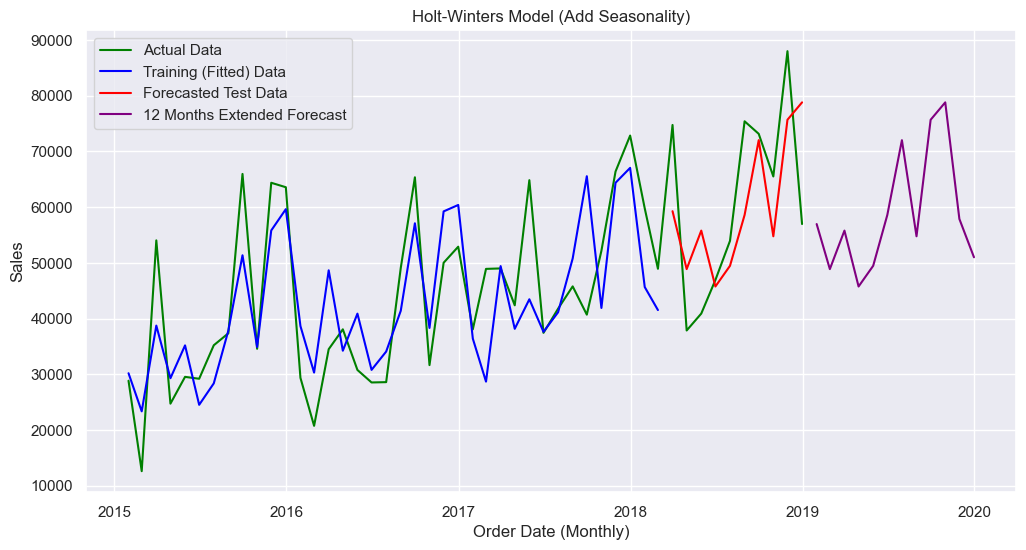

In [66]:
# Best hyperparameters defined after fine tuning the holt-winter
alpha = 0.1  # Smoothing parameter for the level component
beta = 0.1  # Smoothing parameter for the trend component
gamma = 0.1 # Smoothing parameter for the seasonal component
damped = False # Whether the trend component should be damped

# Initialize the ExponentialSmoothing model with hyperparameters
model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=12, trend='add', damped=damped)

# Fit the model with the specified hyperparameters
model_fit = model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)

# Print the summary of the model
print(model_fit.summary())

# Make out-of-sample forecasts for the test set
forecast = model_fit.forecast(steps=len(test))


fitted = model_fit.fittedvalues  # Fitted values for training data

# Create an index for the forecasted data starting right after training data
forecast.index = pd.date_range(start=train.index[-1] + pd.DateOffset(months=1), periods=len(test), freq='M')

# Extend the index for a 12-month forecast after the test data
forecast_extended = pd.date_range(start=test.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')
forecast = pd.concat([forecast, pd.Series(data=np.nan, index=forecast_extended)])

# Plot the actual data, training (fitted) data, and forecasted values with different colors
plt.figure(figsize=(12, 6))
plt.plot(df_winter.index, df_winter, label='Actual Data', color='green')
plt.plot(train.index, fitted, label='Training (Fitted) Data', color='blue')
plt.plot(forecast.index, forecast, label='Forecasted Test Data', color='red')

# Get the last value of the test data
last_test_value = test[-1]



# Extend the forecast for an additional 12 months after the test data ends
forecast_extended = model_fit.forecast(steps=12)
forecast_extended.index = pd.date_range(start=test.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')

# Set the first value of the extended forecast to be the last value of the test data
forecast_extended.iloc[0] = last_test_value

plt.plot(forecast_extended.index, forecast_extended, label='12 Months Extended Forecast', color='purple')

plt.legend()
plt.xlabel('Order Date (Monthly)')
plt.ylabel('Sales')
plt.title('Holt-Winters Model (Add Seasonality)')
plt.show()

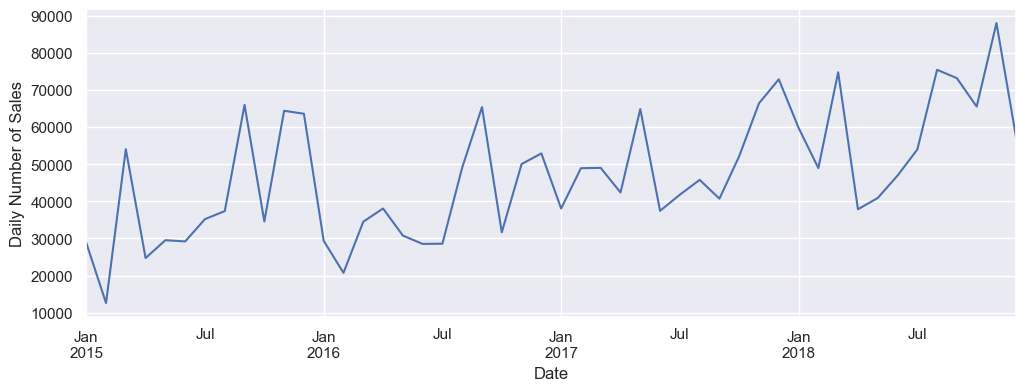

In [67]:
# plot daily sales
ax = df_winter.plot(figsize = (12, 4))
ax.set_ylabel('Daily Number of Sales')
ax.set_xlabel('Date')
plt.show()

### R-Square score for Holt Winter

In [68]:
# Calculate R-squared score for the test data
r2_test = 1 - np.sum((test - forecast[:len(test)]) ** 2) / np.sum((test - np.mean(test)) ** 2)
print(f"R-squared score for test set: {r2_test:.2f}")

# Calculate R-squared score for the training (fitted) data
r2_train = 1 - np.sum((train - fitted) ** 2) / np.sum((train - np.mean(train)) ** 2)
print(f"R-squared score for training (fitted) set: {r2_train:.2f}")

R-squared score for test set: 0.35
R-squared score for training (fitted) set: 0.56


### RSME & MAPE SCORE for Holt Winter

In [69]:
# Get the actual values from the testing set
actual_values = test

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, forecast[:len(actual_values)]))

# Calculate MAPE
mape = np.mean(np.abs((actual_values - forecast[:len(actual_values)]) / actual_values)) * 100

print("RMSE:", rmse)
print("MAPE%:", mape)


RMSE: 12779.175488323612
MAPE%: 18.966745258653077


### Modelling with SARIMA
Seasonal Autoregressive Integrated Moving Average (SARIMA) is a time series forecasting model that extends the capabilities of the Autoregressive Integrated Moving Average (ARIMA) model to account for both seasonality and non-seasonal components in time series data. SARIMA is a powerful method for modeling and forecasting time series data that exhibit both trend and seasonal patterns.

In [70]:
df_copy = df_1[['Order Date', 'Sales']].copy()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  9800 non-null   datetime64[ns]
 1   Sales       9800 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 153.2 KB


I Preprocess the data to get it ready for fine tuning using auto_arima

In [71]:
# Aggregate daily sales
time_sales = df_copy.groupby("Order Date").sum()
time_sales.head(2)

Sales
Order Date          
2015-01-02   468.900
2015-01-03  2203.151

In [72]:
# reset the index
time_sales = time_sales.copy()
time_sales.reset_index(inplace=True)

# Resample the data on 'Sales' price monthly
df_sarima = time_sales.resample('M', on='Order Date').mean()
df_sarima.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2015-01-31 to 2018-12-31
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes


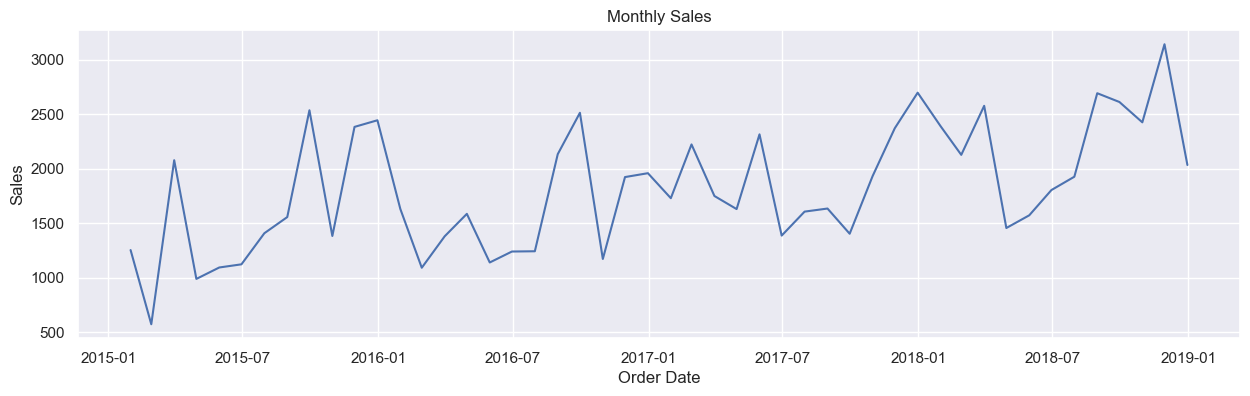

In [73]:
plt.figure(figsize=(15, 4))  
sns.lineplot(x='Order Date', y='Sales', data=df_sarima)
plt.title('Monthly Sales')
plt.show()

This Plot is to ensure that my data is properly aggregated

### Fine Tuning SARIMA

In [74]:
from pmdarima import auto_arima
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [75]:
# Perform auto_arima on the selected column
model_param = auto_arima(df_sarima, seasonal=True, m=12, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=743.010, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=734.179, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=741.043, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=732.556, Time=0.04 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=734.227, Time=0.03 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=731.010, Time=0.05 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=732.959, Time=0.10 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=732.973, Time=0.09 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(3,1,0)(0,0,0)[12] intercept   : AIC=732.984, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=732.931, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=inf, T

In [76]:
# Define SARIMA model hyperparameters, defined after fine tuning
order = (0, 1, 1)  # (p, d, q) # Non-seasonal order
seasonal_order = (0, 0, 0, 12)  # (P, D, Q, S) - Seasonal order

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -343.687
Date:                Sun, 12 May 2024   AIC                            691.374
Time:                        21:05:06   BIC                            694.987
Sample:                    01-31-2015   HQIC                           692.721
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7197      0.107     -6.716      0.000      -0.930      -0.510
sigma2      2.506e+05   6.19e+04      4.048      0.000    1.29e+05    3.72e+05
Ljung-Box (L1) (Q):                   0.51   Jarque-

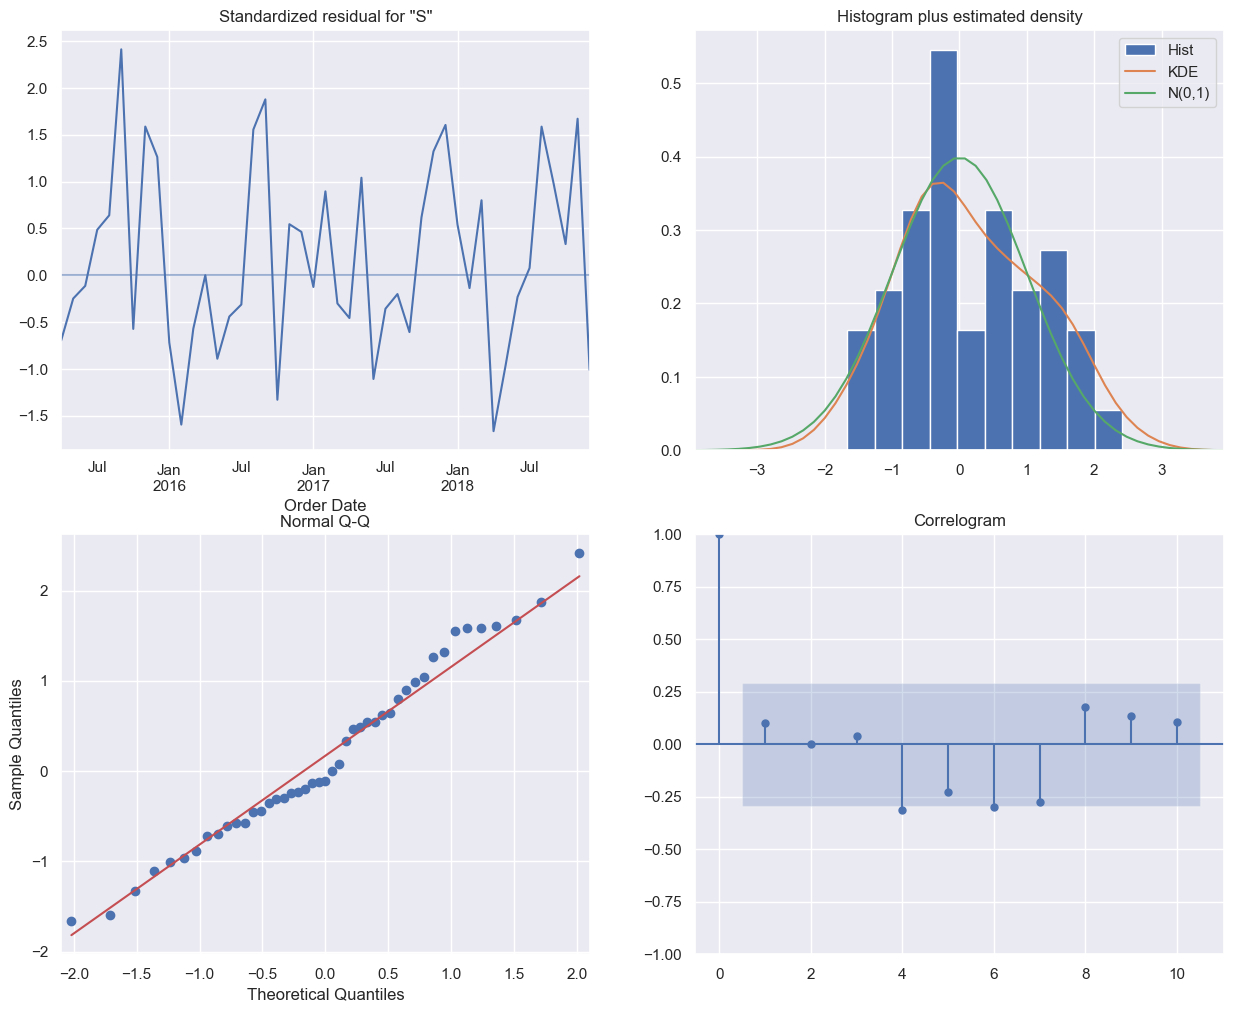

In [77]:
# Initialize the SARIMA model
sarima_model = sm.tsa.SARIMAX(df_sarima, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)

# Fit the SARIMA model to all of the actual data
result = sarima_model.fit()


# Print the summary of the model
print(result.summary())

# plot diagnostics to check for any unusual behavior in the model residuals
result.plot_diagnostics(figsize=(15, 12))
plt.show()

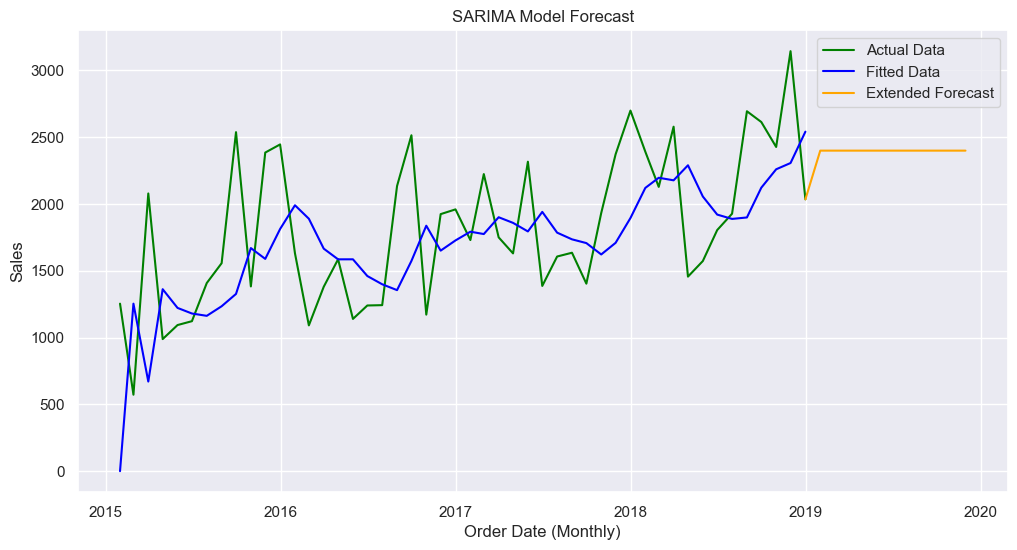

In [78]:
# Make out-of-sample forecasts for the following twelve months
forecast_extended_index = pd.date_range(start=df_sarima.index[-1], periods=12, freq='M')
forecast_extended = result.get_forecast(steps=12, index=forecast_extended_index)

# Set the first value of the extended forecast to be the last value of the actual data
forecast_extended.predicted_mean[0] = df_sarima.iloc[-1]

# Calculate R-squared score for the fitted data
fitted = result.fittedvalues  # Fitted values for all the actual data



# Plot the actual data, fitted data, and extended forecast
plt.figure(figsize=(12, 6))
plt.plot(df_sarima.index, df_sarima, label='Actual Data', color='green')
plt.plot(df_sarima.index, fitted, label='Fitted Data', color='blue')
plt.plot(forecast_extended_index, forecast_extended.predicted_mean, label='Extended Forecast', color='orange')

plt.legend()
plt.xlabel('Order Date (Monthly)')
plt.ylabel('Sales')
plt.title('SARIMA Model Forecast')
plt.show()



In [79]:
# Calculate R-squared for the fitted data
# Calculate the total sum of squares (TSS)
TSS = ((df_sarima - df_sarima.mean()) ** 2).sum()

# Calculate the residual sum of squares (RSS)
RSS = (result.resid ** 2).sum()

# Calculate R-squared
R_squared = 1 - (RSS / TSS)

print("R-squared:", R_squared)


R-squared: Sales   -0.0194
dtype: float64


In [80]:
# Access AIC and BIC values
aic = result.aic
bic = result.bic

print("AIC:", aic)
print("BIC:", bic)

AIC: 691.3737100820258
BIC: 694.9870350615664


### Evaluation Metrics using RSME & MAPE

In [81]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(df_sarima, fitted))

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(df_sarima, fitted)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)


Root Mean Squared Error (RMSE): 564.8639768043034
Mean Absolute Percentage Error (MAPE): 2015-01-31 00:00:00   NaN
2015-02-28 00:00:00   NaN
2015-03-31 00:00:00   NaN
2015-04-30 00:00:00   NaN
2015-05-31 00:00:00   NaN
2015-06-30 00:00:00   NaN
2015-07-31 00:00:00   NaN
2015-08-31 00:00:00   NaN
2015-09-30 00:00:00   NaN
2015-10-31 00:00:00   NaN
2015-11-30 00:00:00   NaN
2015-12-31 00:00:00   NaN
2016-01-31 00:00:00   NaN
2016-02-29 00:00:00   NaN
2016-03-31 00:00:00   NaN
2016-04-30 00:00:00   NaN
2016-05-31 00:00:00   NaN
2016-06-30 00:00:00   NaN
2016-07-31 00:00:00   NaN
2016-08-31 00:00:00   NaN
2016-09-30 00:00:00   NaN
2016-10-31 00:00:00   NaN
2016-11-30 00:00:00   NaN
2016-12-31 00:00:00   NaN
2017-01-31 00:00:00   NaN
2017-02-28 00:00:00   NaN
2017-03-31 00:00:00   NaN
2017-04-30 00:00:00   NaN
2017-05-31 00:00:00   NaN
2017-06-30 00:00:00   NaN
2017-07-31 00:00:00   NaN
2017-08-31 00:00:00   NaN
2017-09-30 00:00:00   NaN
2017-10-31 00:00:00   NaN
2017-11-30 00:00:00   NaN
2

### Evaluation Metrics Comparison

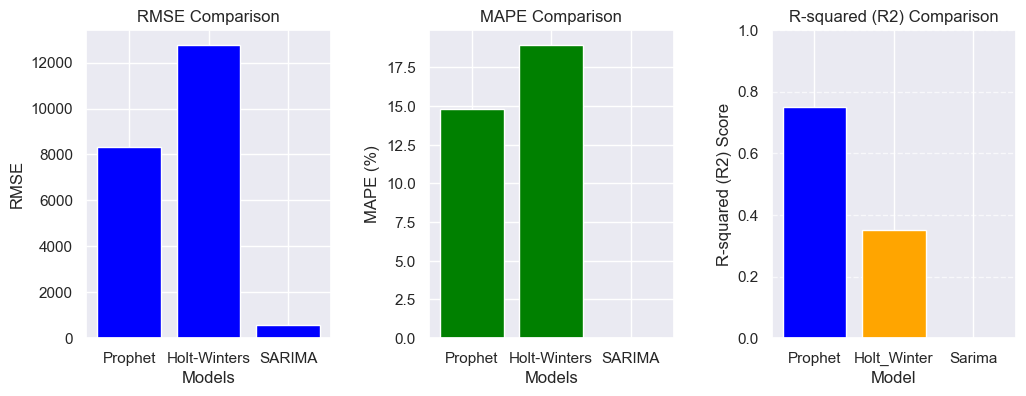

In [88]:
import matplotlib.pyplot as plt

# RMSE and MAPE values for each model
prophet_rmse = 8337.57
prophet_mape = 14.79

holt_winter_rmse = 12778.183925108271
holt_winter_mape = 18.965834617492654

sarima_rmse = 564.8639768043034
sarima_mape = 0

# Create lists for RMSE and MAPE values
models = ['Prophet', 'Holt-Winters', 'SARIMA']
rmse_values = [prophet_rmse, holt_winter_rmse, sarima_rmse]
mape_values = [prophet_mape, holt_winter_mape, sarima_mape]

# Calculate R2 values for each model
r2_values = [0.75, 0.35, -0.0194]  # Replace with actual R2 values

# Model names for the legend
model_names = ['Prophet', 'Holt_Winter', 'Sarima']  # Replace with actual model names

# Create a single figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

# Plot RMSE
ax1.bar(models, rmse_values, color='blue')
ax1.set_title('RMSE Comparison')
ax1.set_xlabel('Models')
ax1.set_ylabel('RMSE')

# Plot MAPE
ax2.bar(models, mape_values, color='green')
ax2.set_title('MAPE Comparison')
ax2.set_xlabel('Models')
ax2.set_ylabel('MAPE (%)')

# Plot R2
ax3.bar(model_names, r2_values, color=['blue', 'orange', 'green'])
ax3.set_xlabel('Model')
ax3.set_ylabel('R-squared (R2) Score')
ax3.set_title('R-squared (R2) Comparison')
ax3.set_ylim(0, 1)
ax3.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

plt.show()

###### CONCLUSION

According to this findings, the Facebook Prophet model demonstrated a notable superiority and a better overall fit compared to the other forecasting models. The prophet model achieved an (R2) value of 0.75, indicating that approximately 75 percent of the variance in the dependent variable was explained by the model’s predictions. While this (R2) value suggests a relatively strong fit of the Prophet model to the data, it’s important
to recognize that a high (R2) value does not guarantee accurate predictions. Similarly, the Holt-Winters model
exhibited a competitive performance, closely like the Prophet model in terms of forecasting accuracy. Both
models recorded low MAPE scores, indicating a high level of accuracy in their forecasts. But, despite these
promising MAPE results, it’s important to consider the absolute error magnitude of these models. However,
both the Prophet and Holt-Winters models displayed relatively high calculated errors, which gave me concerns
about their overall suitability for forecasting performance.
In contrast, SARIMA model stood out with a comparatively lower error magnitude, suggesting superior model
performance in terms of accuracy and reliability. Notably, the observed MAPE score for the SARIMA model
was recorded as 0. While this zero MAPE score might initially appear indicative of perfect forecasting accuracy,
it warrants cautious interpretation. A MAPE score of 0 could either signify exceptionally high forecasting
accuracy or result from an undefined error rate due to zero actual values in the dataset. Therefore, while the
SARIMA model demonstrated to be overall best performance with its low error magnitude, further scrutiny and
validation are necessary to ascertain its true forecasting capabilities and suitability for practical applications.